### **About the Dataset**

Classifying celestial objects such as stars, galaxies, and quasars based on their spectral characteristics is fundamental to modern astronomy. Spectral analysis—considering attributes like temperature, luminosity, and chemical composition—provides deep insights into the physical nature and evolutionary phases of these objects. Historical efforts in stellar cataloging not only revealed the structure of our own galaxy but also led to the identification of external galaxies like Andromeda, marking a pivotal moment in cosmic discovery. This dataset is designed to support the classification of stars, galaxies, and quasars based on their spectral signatures.


### **Column Descriptions**

Each column in the dataset corresponds to a specific observational or classification parameter obtained from the Sloan Digital Sky Survey (SDSS):

* **obj\_ID**: A unique identifier assigned to each object in the SDSS image catalog.
* **alpha**: Right Ascension (RA) in degrees at the J2000 epoch, used to define the celestial longitude of an object.
* **delta**: Declination in degrees at the J2000 epoch, representing the celestial latitude of an object.
* **u, g, r, i, z**: Photometric magnitudes measured through five SDSS filters, capturing light intensity across different wavelength bands:

  * *u* – Ultraviolet
  * *g* – Green
  * *r* – Red
  * *i* – Near-infrared
  * *z* – Infrared
* **run\_ID**: Identifies the specific SDSS sky scan ("run") in which the object was recorded.
* **rerun\_ID**: Specifies the image processing version or calibration settings applied during data reduction.
* **cam\_col**: Indicates the camera column (or scanline) within the run, corresponding to a specific CCD sensor.
* **field\_ID**: Denotes a specific field or segment of the sky within a camera column.
* **spec\_obj\_ID**: Unique identifier for each object observed spectroscopically. Objects with the same `spec_obj_ID` are expected to have consistent spectral classifications (star, galaxy, or quasar).
* **class**: Spectral classification of the object, determined as either a **star**, **galaxy**, or **quasar**.
* **redshift**: A dimensionless measure of how much the wavelength of light from the object has been stretched due to cosmic expansion. It provides an estimate of distance and the object's relative motion.
* **plate**: Identifies the spectroscopic plate used to gather the light from multiple celestial objects during a given observation.
* **MJD**: Modified Julian Date of the observation, representing the time the data was captured in astronomical timekeeping.
* **fiber\_ID**: ID of the optical fiber that directed the object's light to the spectrograph. Each fiber corresponds to a unique target on a spectroscopic plate.

Together, these features enable detailed classification and analysis of celestial bodies, offering insights into their physical properties, distances, and evolutionary stages based on their spectral behavior.

- **Quasars**:
    - A quasar is an extremely luminous active galactic nucleus (AGN), sometimes also known as a quasi-stellar object, abbreviated QSO. This emission from an AGN is powered by a supermassive black hole with a mass ranging from millions to tens of billions of solar masses, surrounded by a gaseous accretion disc. Gas in the disc falling towards the black hole heats up because of friction and releases energy in the form of electromagnetic radiation. The radiant energy of quasars is enormous; the most powerful quasars have luminosities thousands of times greater than that of a galaxy such as the Milky Way.
- **Stars**:
    - A star's life begins with the gravitational collapse of a gaseous nebula of material composed primarily of hydrogen, along with helium and trace amounts of heavier elements. Its total mass is the main factor determining its evolution and eventual fate. A star shines for most of its active life due to the thermonuclear fusion of hydrogen into helium in its core. This process releases energy that traverses the star's interior and radiates into outer space. At the end of a star's lifetime, its core becomes a stellar remnant: a white dwarf, a neutron star, or—if it is sufficiently massive—a black hole.
- **Galaxies**:
    - A galaxy is a system of stars, stellar remnants, interstellar gas, dust, dark matter, bound together by gravity. Galaxies, averaging an estimated 100 million stars,range in size from dwarfs with less than a hundred million stars, to the largest galaxies known – supergiants with one hundred trillion stars each orbiting its galaxy's center of mass. Most of the mass in a typical galaxy is in the form of dark matter, with only a few percent of that mass visible in the form of stars and nebulae. Supermassive black holes are a common feature at the centres of galaxies.  

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude
import astropy.units as unit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
star_data = pd.read_csv("dataset/star_classification.csv")

In [ ]:
star_data.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [ ]:
star_data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
star_data.shape

(100000, 18)

In [ ]:
star_data.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [ ]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

## **Checking Missing Values and Handling them**

In [ ]:
star_data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

## **Removing irrelavent Columns**

As the ID columns are the unique values for the dataset we are checking the values and droping form the dataset

In [ ]:
columns = ['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']

# Loop through the column names and calculate unique values for each
for col in columns:
    unique_count = star_data[col].nunique()
    print(f"The unique values in {col} are {unique_count}")

The unique values in obj_ID are 78053
The unique values in run_ID are 430
The unique values in rerun_ID are 1
The unique values in field_ID are 856
The unique values in spec_obj_ID are 100000
The unique values in fiber_ID are 1000


In [ ]:
star_data.drop(columns= columns, axis= 1, inplace= True)

In [ ]:
star_data.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   cam_col   class  redshift  plate    MJD  
0        2  GALAXY  0.634794   5812  56354  
1        5  GALAXY  0.779136  10445  58158  
2        2  GALAXY  0.644195   4576  55592  
3        3  GALAXY  0.932346   9149  58039  
4        3  GALAXY  0.116123   6121  56187

In [ ]:
star_data.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'class',
       'redshift', 'plate', 'MJD'],
      dtype='object')

In [ ]:
star_data['cam_col'].unique()

array([2, 5, 3, 4, 6, 1])

### Taking out 5 records from data set to check performance in the deployed model

In [ ]:
sample_data = star_data.sample(n = 5, random_state=47)

sample_data.to_csv("checking.csv", index = False)

star_data.drop(sample_data.index)

star_data.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   cam_col   class  redshift  plate    MJD  
0        2  GALAXY  0.634794   5812  56354  
1        5  GALAXY  0.779136  10445  58158  
2        2  GALAXY  0.644195   4576  55592  
3        3  GALAXY  0.932346   9149  58039  
4        3  GALAXY  0.116123   6121  56187

In [ ]:
sample_data

alpha      delta         u         g         r         i  \
93899    5.594267   0.139084  22.03138  21.03268  20.07739  19.64677   
66968   15.173133  -6.363763  25.98026  22.76439  20.84574  19.72769   
82817  127.270683  19.672462  23.14354  21.76209  19.95079  19.13606   
23556   38.325890  -3.766826  21.46732  20.73737  20.75849  20.75842   
61885   39.724400  -0.587740  21.08614  20.65918  19.92450  19.51583   

              z  cam_col   class  redshift  plate    MJD  
93899  19.37896        4  GALAXY  0.288054   4219  55480  
66968  19.06375        6  GALAXY  0.548455   7156  56959  
82817  18.57599        5  GALAXY  0.372808   4483  55587  
23556  20.56014        4    STAR -0.000533   4386  55540  
61885  19.30347        2  GALAXY  0.455118   1070  52591

## **Exploratory Data Analysis (EDA)**

In [ ]:
data = star_data.drop(columns='class', axis= 1)
data.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   cam_col  redshift  plate    MJD  
0        2  0.634794   5812  56354  
1        5  0.779136  10445  58158  
2        2  0.644195   4576  55592  
3        3  0.932346   9149  58039  
4        3  0.116123   6121  56187

### **Data Normalization**


**Normalization** is a preprocessing step that scales numerical features to a common range, usually between 0 and 1 or to a standard normal distribution (mean 0, std 1).

* It prevents features with large values from dominating the model.
* It helps algorithms like KNN, SVM, and neural networks perform better and converge faster.
* It ensures more stable and efficient training.

**In short:** Normalization makes all features equally important and helps the model learn more effectively.


In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
data

array([[0.37690482, 0.50380246, 0.99911256, ..., 0.09183086, 0.45159189,
        0.64800655],
       [0.40228576, 0.49181212, 0.99920216, ..., 0.11238889, 0.8288413 ,
        0.89432004],
       [0.39495978, 0.53413882, 0.99925055, ..., 0.09316979, 0.35094862,
        0.54396505],
       ...,
       [0.62384846, 0.33880973, 0.99884246, ..., 0.02183899, 0.20340363,
        0.399645  ],
       [0.58962907, 0.6429744 , 0.99925925, ..., 0.06622931, 0.52805146,
        0.64991808],
       [0.54692681, 0.67052516, 0.99898725, ..., 0.07874916, 0.58171159,
        0.75040961]])

In [ ]:
data = pd.DataFrame(data= data, columns= ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col',
       'redshift', 'plate', 'MJD'])

In [ ]:
data.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD  
0      0.2  0.091831  0.451592  0.648007  
1      0.8  0.112389  0.828841  0.894320  
2      0.2  0.093170  0.350949  0.543965  
3      0.4  0.134210  0.723312  0.878072  
4      0.4  0.017959  0.476753  0.625205

In [ ]:
data['class'] = star_data['class']

In [ ]:
data.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD   class  
0      0.2  0.091831  0.451592  0.648007  GALAXY  
1      0.8  0.112389  0.828841  0.894320  GALAXY  
2      0.2  0.093170  0.350949  0.543965  GALAXY  
3      0.4  0.134210  0.723312  0.878072  GALAXY  
4      0.4  0.017959  0.476753  0.625205  GALAXY

Checking Distribution of the target variable 'class' before analysis

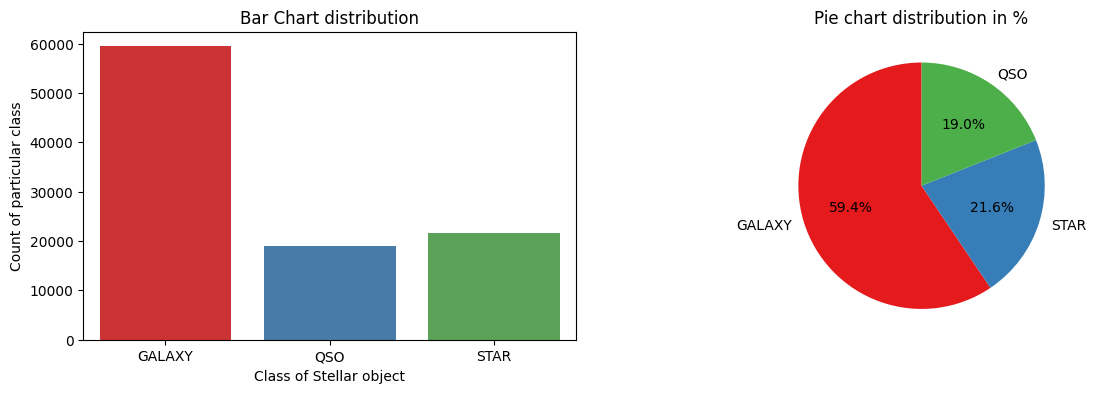

In [ ]:
plt.figure(figsize= (14,4))

plt.subplot(1,2,1)
palette_colors = sns.color_palette("Set1")
ax = sns.countplot(data= data, x= 'class', palette= palette_colors)
plt.xlabel("Class of Stellar object")
plt.ylabel("Count of particular class")
plt.title("Bar Chart distribution")


plt.subplot(1,2,2)
distribution = data['class'].value_counts()
plt.pie(x=distribution, labels= distribution.index, autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('Set1') )
plt.title("Pie chart distribution in %")
plt.show()

We have an imbalanced data target distribution.

However this particular dataset has **Sufficient Feature Discriminability**: which means that features in the dataset (especially the photometric magnitudes and redshift) are highly discriminative for the different classes, even with the imbalance.
Thus the models should be able to perform well across all classes, including the minority ones, even without balancing the training data. In some cases, if the chosen evaluation metrics show satisfactory performance on the imbalanced data, explicitly balancing might not be deemed necessary, especially if it adds complexity or computational cost.

In [ ]:
# Remove rows where the photometric magnitude values are marks as invalid, or missing specifically those with a value of -9999.0 as it is a placeholder for missing and invalid points.


mask = (data['u'] == -9999.0) | (data['g'] == -9999.0) | (data['r'] == -9999.0) | (data['i'] == -9999.0) | (data['z'] == -9999.0)

data = data[~mask]
data.describe()

alpha          delta              u              g  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.493407       0.421676       0.998923       0.998896   
std         0.268066       0.193000       0.003167       0.003165   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.354208       0.235122       0.998761       0.998740   
50%         0.502495       0.416868       0.998943       0.998953   
75%         0.649703       0.576572       0.999093       0.999055   
max         1.000000       1.000000       1.000000       1.000000   

                   r              i              z        cam_col  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.497407       0.424097       0.998932       0.502322   
std         0.093913       0.077537       0.003164       0.317382   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.420954       0.364438       0.998811       0.200000   
50%         0.521688       0.438225       0.998965       0.600000   
75%         0.568245       0.481951       0.999056       0.800000   
max         1.000000       1.000000       1.000000       1.000000   

            redshift          plate            MJD  
count  100000.000000  100000.000000  100000.000000  
mean        0.083551       0.396630       0.543507  
std         0.104071       0.240396       0.246926  
min         0.000000       0.000000       0.000000  
25%         0.009185       0.184024       0.358547  
50%         0.061833       0.384415       0.581718  
75%         0.101710       0.580918       0.705762  
max         1.000000       1.000000       1.000000

### **Mollweide Projection**

The positions of the objects can be plotted on a celestial sphere, allowing you to see the distribution of objects in the sky.

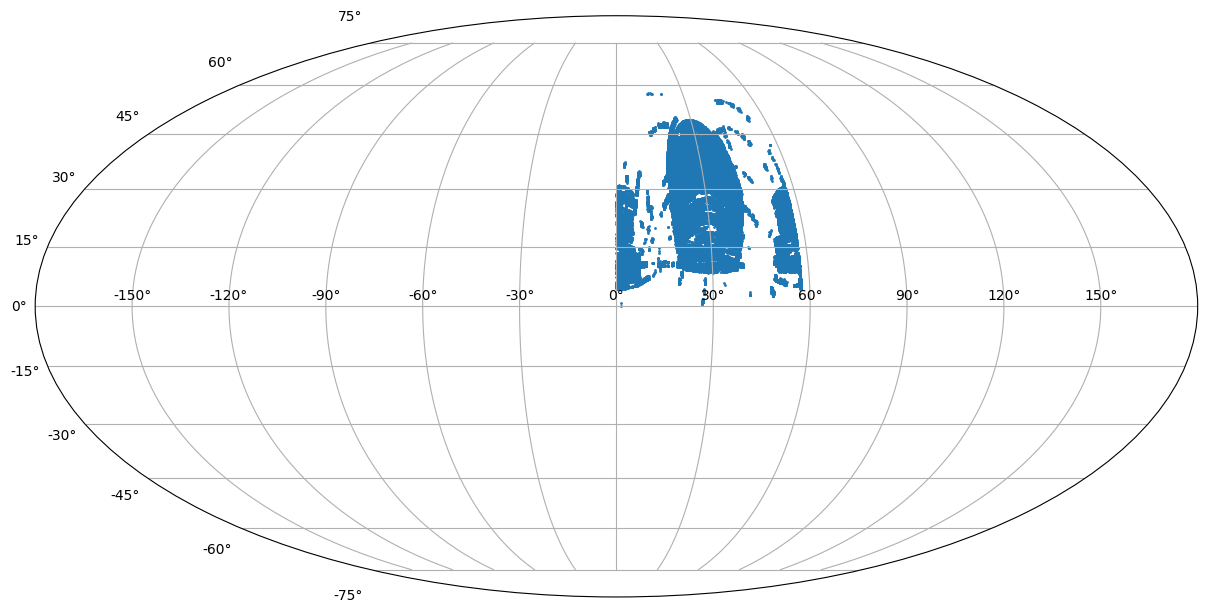

In [ ]:
ra = Longitude(data['alpha'], unit.radian)
dec = Latitude(data['delta'], unit.radian)
coords = SkyCoord(ra=ra, dec=dec, frame='icrs')

fig = plt.figure(figsize=(15, 15))
axis = fig.add_subplot(111, projection="mollweide")
axis.scatter(coords.ra.wrap_at(180*unit.degree).radian, coords.dec.radian, s=1)
axis.grid(True)
plt.show()

### **Encoding the class variable**

We will be changing the 'class' variable values to number in the dataset using encoding

In [ ]:
data['class'] = data['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})
data.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD  class  
0      0.2  0.091831  0.451592  0.648007      0  
1      0.8  0.112389  0.828841  0.894320      0  
2      0.2  0.093170  0.350949  0.543965      0  
3      0.4  0.134210  0.723312  0.878072      0  
4      0.4  0.017959  0.476753  0.625205      0

### **Outlier Analysis**

###### Outlier detection is a crucial step in data preprocessing. Outliers are data points that significantly deviate from other observations, potentially indicating errors in data collection, measurement, or representing rare phenomena. Their presence can heavily influence statistical analyses and machine learning models, often leading to biased results, reduced model performance, or misleading interpretations.

##### In this dataset, identifying outliers in stellar characteristics (like magnitudes or redshift) is important because:
##### 1.  **Data Quality**: Extreme values might arise from instrumental errors, processing artifacts, or misclassification during the survey. Identifying and understanding these helps assess data reliability.
##### 2.  **Astrophysical Significance**: Some extreme values could represent genuinely rare or unusual celestial objects (e.g., exceptionally bright or distant quasars, unique types of stars or galaxies). Analyzing these outliers might lead to new scientific discoveries.

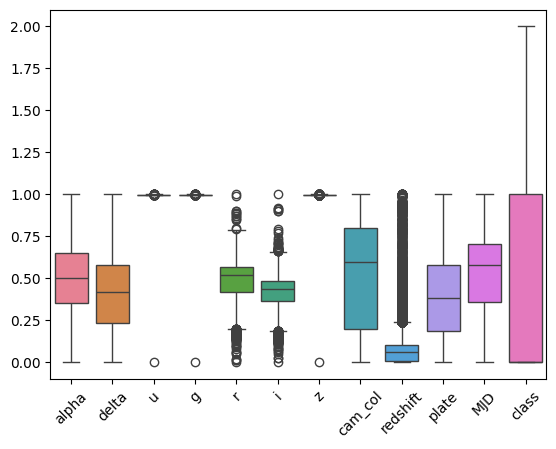

In [ ]:
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

From the above plot we can see there are ouliers in the columns 'u', 'g', 'r', 'i', 'z', and more in 'red shift'. Let us try to remove them.

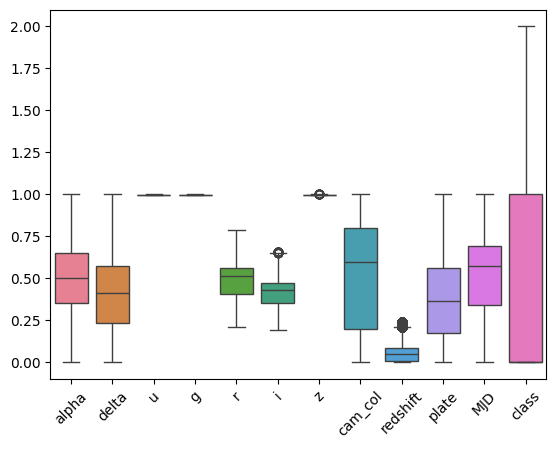

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter out the outliers
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

# Create a copy of the data
data_clean = data.copy()

# Remove outliers for each numeric column
for col in data_clean.select_dtypes(include='number').columns:
    data_clean = remove_outliers(data_clean, col)

# Plot the boxplot with outliers removed
sns.boxplot(data=data_clean)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Let us now check the percent of ouliers compared to data with outlier
removed_percent = ((data.shape[0] - data_clean.shape[0]) / data.shape[0]) * 100
print(f'Percentage of outliers removed from the data set is {removed_percent}%')

Percentage of outliers removed from the data set is 9.4%


Percentage of outliers removed from the data set is 9.4%

### **Univariate Analysis**

##### Univariate analysis involves examining variables individually. This is done to understand the distribution, central tendency (mean, median, mode), and variability (variance, standard deviation, range) of each numerical variable, and the frequency distribution of categorical variables. It provides foundational insights into the characteristics of the data before exploring relationships between variables.


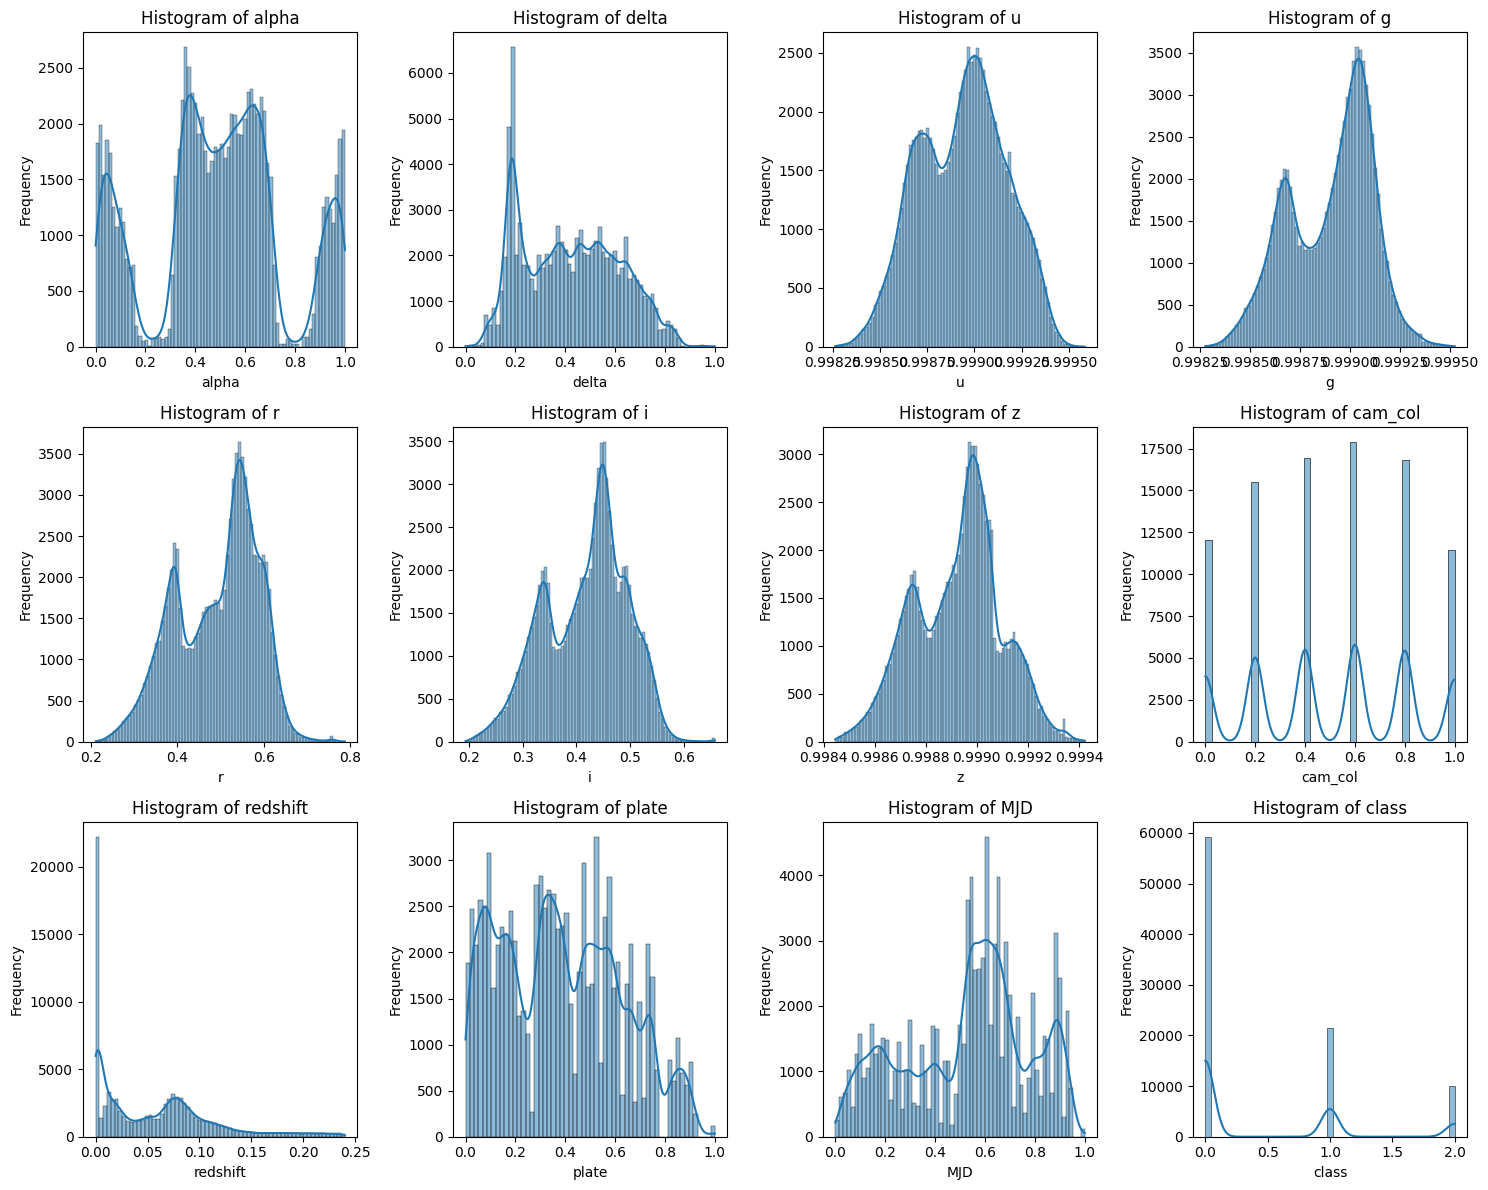

In [ ]:
import math

# Select numeric columns from the dataset
numeric_columns = data_clean.select_dtypes(include='number').columns

# Calculate the number of rows needed based on the number of columns
n_cols = 4
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Set up the subplot grid with 3 columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

# Flatten axes in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data_clean[col], ax=axes[i], kde=True)  # Plot with KDE curve
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


Univariate analysis of the numerical features in the dataset provides the following insights:

*   **Right Ascension (alpha) and Declination (delta)**: The histograms show a relatively uniform distribution for both `alpha` and `delta`. This suggests that the observed objects are distributed across a broad range of celestial coordinates within the survey area, without strong clustering around specific points in the sky.

*   **Photometric Magnitudes (u, g, r, i, z)**: These magnitudes show distributions that are somewhat skewed. The peaks are generally towards brighter magnitudes (smaller numerical values after normalization), indicating that the survey captured a significant number of relatively brighter objects in these filter bands. The distributions also show tails extending towards fainter magnitudes.

*   **Camera Column (cam_col)**: This appears to be a categorical or discrete numerical feature. The histogram indicates the frequency of observations from different camera columns. There are varying counts per column, reflecting the survey's observation strategy or the structure of the data acquisition.

*   **Redshift**: The redshift distribution is heavily skewed towards lower values. This is expected, as objects with higher redshifts are generally fainter and harder to observe. The majority of objects in this dataset are relatively nearby (lower redshift), with a long tail extending towards higher redshifts, representing more distant objects, particularly quasars.

*   **Plate and MJD**: Similar to `cam_col`, `plate` and `MJD` (Modified Julian Date) are observational identifiers. Their histograms show the distribution of observations across different spectroscopic plates and over time. These distributions likely reflect the scheduling and execution of the SDSS spectroscopic surveys.

Overall, the univariate analysis reveals the distribution characteristics of each feature. It highlights the predominance of lower redshift objects and provides insights into the survey's spatial coverage and observation methods through the distributions of `alpha`, `delta`, `cam_col`, `plate`, and `MJD`. The skewed distributions of photometric magnitudes and redshift are typical for astronomical surveys that are limited by detection sensitivity.

In [ ]:
data_clean.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift',
       'plate', 'MJD', 'class'],
      dtype='object')

### Bivariate Analysis

In [ ]:
columns1 = ['alpha', 'delta', 'u', 'g', 'r', 'class']
columns2 = ['i', 'z', 'cam_col', 'redshift', 'plate', 'MJD', 'class']

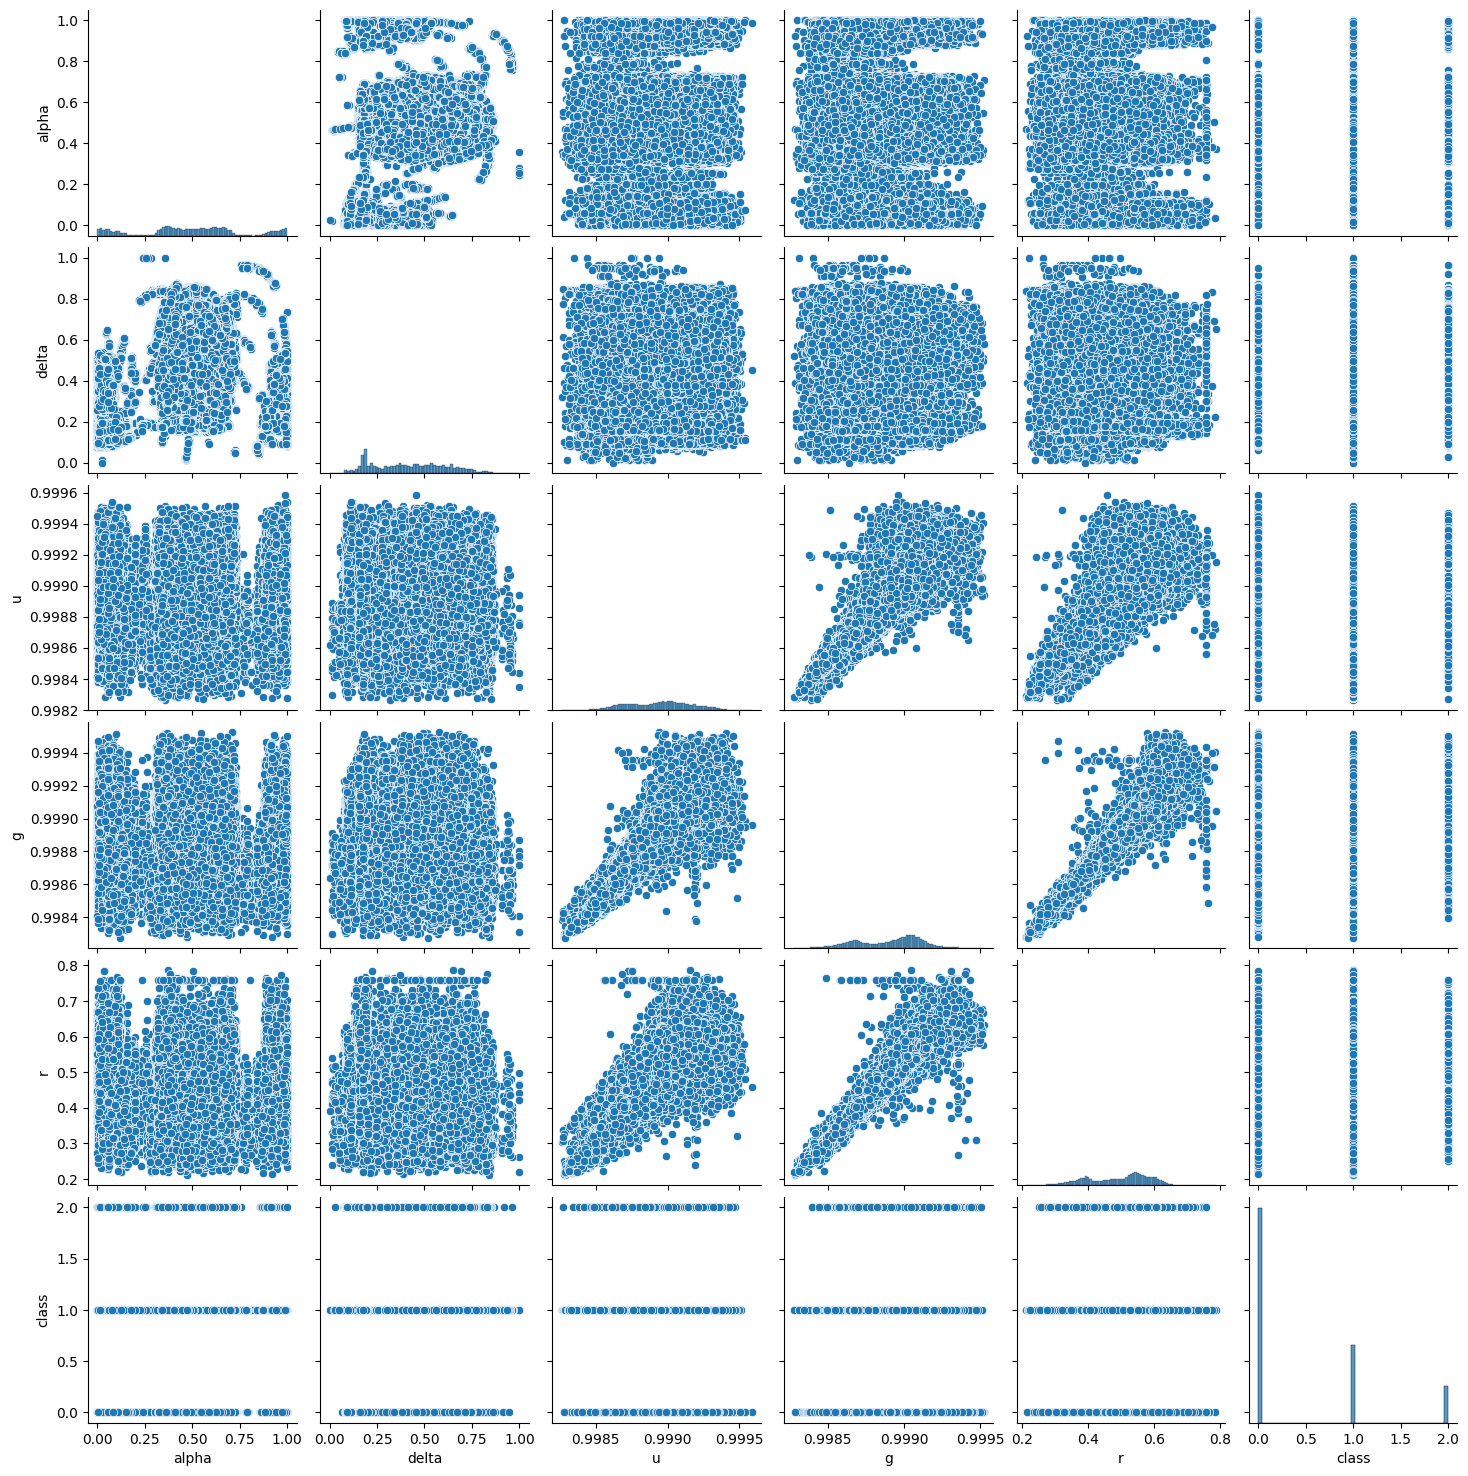

In [ ]:
sns.pairplot(data=data_clean[columns1])
plt.show()


The pairplot of `['alpha', 'delta', 'u', 'g', 'r', 'class']` helps visualize how features relate to each other and to the object class (Star, Galaxy, Quasar).

* **Diagonal Plots**: Show how each feature (like `u`, `g`, `r`, etc.) is distributed. Useful for spotting patterns like skewness or clusters.

* **Scatter Plots (Off-diagonal)**:

  * **`u`, `g`, `r` magnitudes** show clear separation between Stars, Galaxies, and Quasars.
  * Stars often form tight lines, galaxies are more spread out, and quasars are in unique regions.
  * These color combinations are powerful for classification.

* **`alpha` vs `delta`**: Shows where objects are located in the sky. You might see clusters of certain object types in specific regions.

* **Other Plots (e.g., `alpha` vs `u`)**: Less useful for classification, but may show survey biases.

#### Overall:

* Photometric magnitudes (`u`, `g`, `r`) are great features for classification.
* Good visual separation means ML models can learn these differences well.
* Spatial data (`alpha`, `delta`) gives survey context but less classification power.

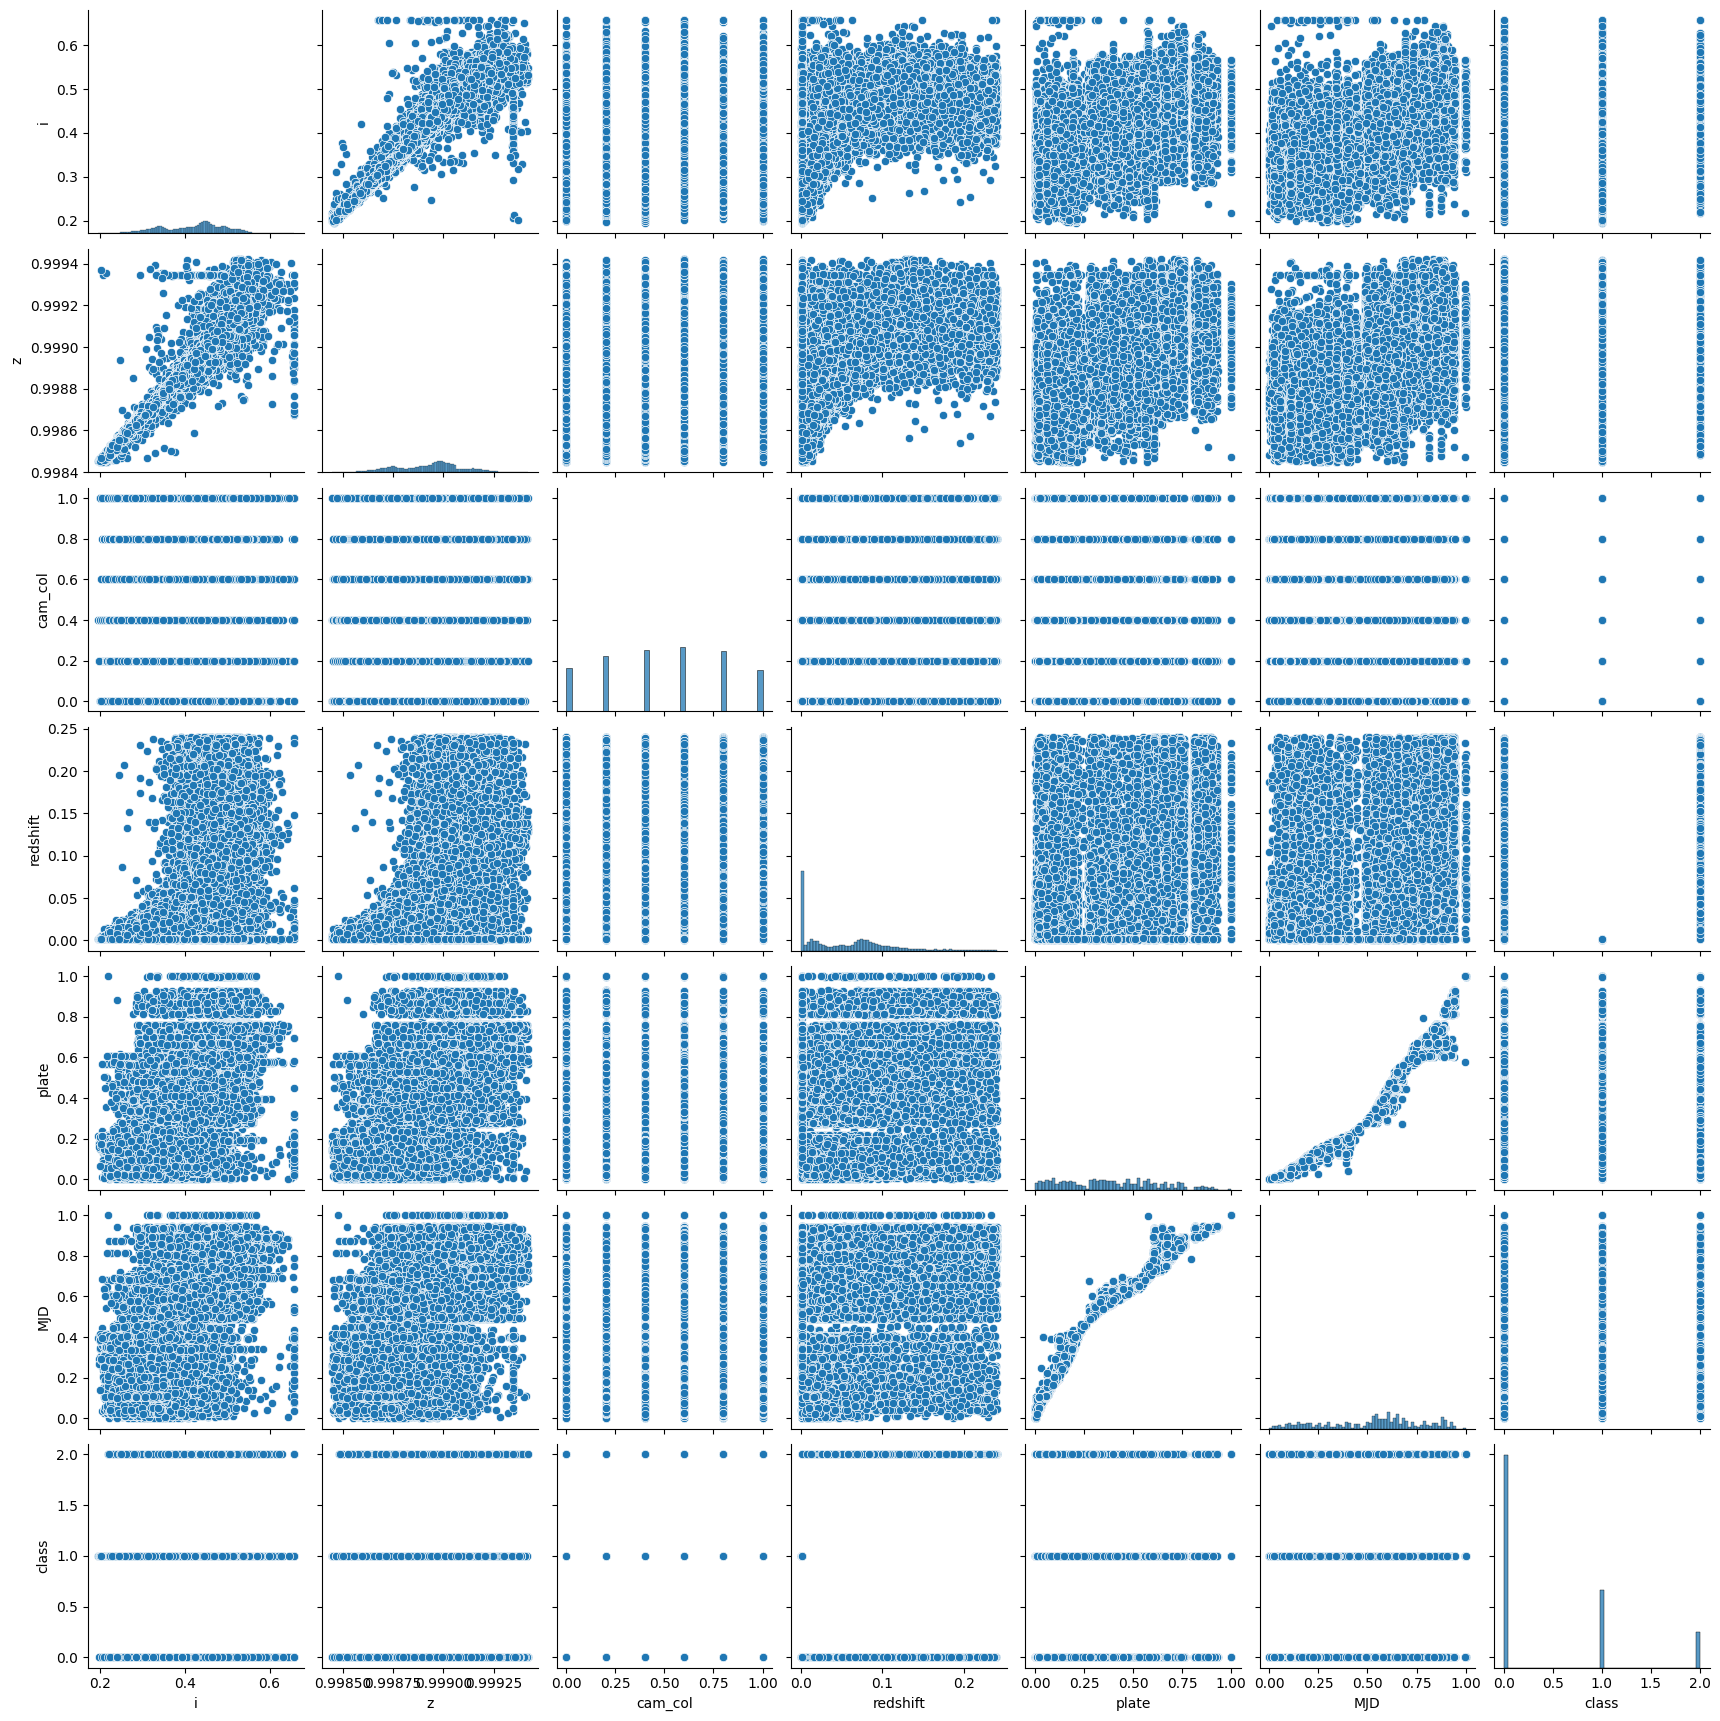

In [ ]:
sns.pairplot(data=data_clean[columns2])
plt.show()


### **Bivariate Analysis Summary**

We explore how different features relate to each other based on the object class (0: Galaxy, 1: Star, 2: Quasar). Here's what we found:



#### 1. **Redshift & Class**

* **Quasars** have the highest redshift values (they are far away).
* **Stars** have redshifts close to zero (they're within our galaxy).
* **Galaxies** fall in between.
* Higher redshift objects are also fainter in magnitude.



#### 2. **Photometric Magnitudes (`u`, `g`, `r`, `i`, `z`)**

* Magnitude pairs show **clear clusters** for each class.
* **Stars** form tight, linear groups.
* **Galaxies** are more spread out.
* **Quasars** show broader, overlapping patterns.
* Color combinations (like `u-g` vs `g-r`) help differentiate objects well.



#### 3. **Celestial Coordinates (`alpha`, `delta`)**

* These don't show clear separation between classes.
* Positions in the sky are mixed, as expected.



#### 4. **Observational Features (`cam_col`, `plate`, `MJD`)**

* These reflect **when and how** the data was collected.
* They don’t directly help classify the objects but may show patterns from the survey’s strategy.




Redshift and photometric magnitudes are the **most useful features** for classifying celestial objects. Coordinates and observational details help understand the survey but don’t strongly influence classification.


In [ ]:
data_clean.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD  class  
0      0.2  0.091831  0.451592  0.648007      0  
1      0.8  0.112389  0.828841  0.894320      0  
2      0.2  0.093170  0.350949  0.543965      0  
3      0.4  0.134210  0.723312  0.878072      0  
4      0.4  0.017959  0.476753  0.625205      0

### **Correlation**

##### Correlation is a statistical measure that expresses the extent to which two variables are linearly related. It's a valuable tool in data analysis to:

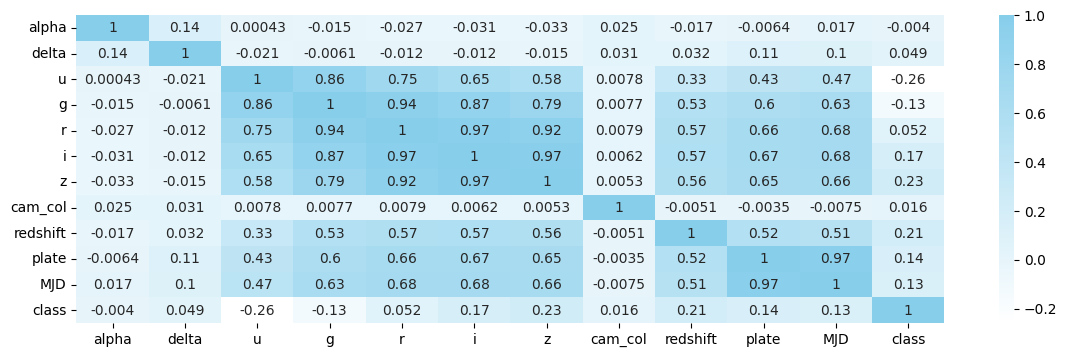

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

correl = data_clean.corr()

plt.figure(figsize= (14,4))

# Define a custom single-color colormap
single_color_cmap = LinearSegmentedColormap.from_list("single_color", ["white", "skyblue"])
# single_color_cmap = LinearSegmentedColormap.from_list()


# Plot the heatmap with the custom colormap
sns.heatmap(correl, cmap=single_color_cmap, annot=True)
plt.show()

Here the correlation heatmap only visualizes **positive correlations** (from `0` to `1`) using **shades of blue**, without showing any negative relationships.

* **Darker Blue (Closer to 1):** Strong positive correlation — two features increase together.
* **Lighter Blue (Closer to 0):** Weak or no correlation between features.

#### Key Observations:

* **Photometric Magnitudes (`u`, `g`, `r`, `i`, `z`)** are strongly correlated — they behave similarly for most objects.
* **'class'** has noticeable correlations with features like `redshift` and magnitudes — helpful for classification.
* **Observational Features** like `plate`, `MJD`, and `cam_col` show weak or survey-based correlations.

#### Conclusion:

Even with only positive correlations, the heatmap helps identify which features are most related — useful for feature selection and understanding data structure.


# **Splitting the Dataset**

In [ ]:
X = data_clean.drop('class', axis = 1)
y = data_clean['class']
X.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD  
0      0.2  0.091831  0.451592  0.648007  
1      0.8  0.112389  0.828841  0.894320  
2      0.2  0.093170  0.350949  0.543965  
3      0.4  0.134210  0.723312  0.878072  
4      0.4  0.017959  0.476753  0.625205

In [ ]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    2
6    2
7    0
8    0
9    1
Name: class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
X_train.shape, y_train.shape

((67950, 11), (67950,))

# **Model Development & Evaluation**


#### **Machine Learning Algorithms used :-**
1. Decision Tree Classifier
2. Random Forest Classifier
3. K-Nearest neighbour Classifier
4. Support Vector Machine Classifier
5. Gradient Boosting Classifier
6. AdaBoosting Classfier
7. XGBoost Classifier

#### **Evaluation Metrics**
*   **Precision**: Measures the accuracy of the positive predictions. It is the ratio of true positives to the total number of positive predictions (true positives + false positives). High precision means fewer false positives.
Of all predicted positives, how many were actually correct.

*   **Recall**: Measures the ability of the model to find all the relevant instances. It is the ratio of true positives to the total number of actual positives (true positives + false negatives). High recall means fewer false negatives.
Of all actual positives, how many were correctly found.

*   **F1 Score**: The harmonic mean of precision and recall. It provides a single score that balances both concerns. It's particularly useful when you need a balance between precision and recall and for imbalanced datasets.
A single score that balances precision and recall.

*   **Accuracy**: Measures the overall correctness of the model. It is the ratio of correctly predicted instances (true positives + true negatives) to the total number of instances.
Overall, how many predictions were correct.


### **Understanding Confusion Matrix and ROC Curve**

When evaluating classification models using metrics like precision, recall, and F1 score, the **Confusion Matrix** and **ROC Curve** help visualize performance and identify strengths and weaknesses in prediction.

### **Confusion Matrix**

A Confusion Matrix shows how well a classification model performs by comparing predicted vs actual values.
Each row represents the actual class, each column the predicted class (or vice versa).

It breaks predictions into:

* **True Positives (TP):** Correct positive predictions
* **True Negatives (TN):** Correct negative predictions
* **False Positives (FP):** Incorrect positive predictions ("false alarms")
* **False Negatives (FN):** Missed positive cases ("misses")

It helps identify:

* Which classes are correctly predicted
* Where the model is making errors (false positives/negatives)
* Which classes are being confused

For multi-class problems (e.g., Star, Galaxy, Quasar), it's a larger square matrix. Diagonal = correct predictions; off-diagonal = misclassifications.

### **ROC Curve (Receiver Operating Characteristic)**

The ROC curve shows how well a binary classifier distinguishes between classes as the threshold changes. It plots:

* **True Positive Rate (TPR) = TP / (TP + FN)**
* **False Positive Rate (FPR) = FP / (FP + TN)**

* A perfect model touches the top-left corner (TPR = 1, FPR = 0)
* A random model follows the diagonal
* **AUC (Area Under the Curve)** gives an overall performance score:

  * 1 = perfect, 0.5 = random

ROC can be extended to multi-class problems using one-vs-rest strategies.


### Summary

* **Confusion Matrix** gives a detailed view at one threshold — useful for spotting misclassifications.
* **ROC Curve & AUC** give a broader view — useful for comparing models across thresholds.

Both are essential for evaluating how well your model classifies different types of celestial objects.


## **1. Decision Tree Classifier**


##### A Decision Tree Classifier is a supervised learning algorithm used for classification tasks. It works by recursively partitioning the data into subsets based on the values of the features. The process creates a tree-like structure where internal nodes represent tests on attributes, branches represent the outcome of the test, and leaf nodes represent the class label. It's interpretable and can handle both numerical and categorical data.

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)

The Accuracy score for Decision Tree Classifier is 0.96
The Weighted Precision score for Decision Tree Classifier is 0.96
The Weighted Recall score for Decision Tree Classifier is 0.96
The F1 score for Decision Tree Classifier is 0.9589
The Confusion Matrix for Decision Tree Classifier is 
[[14392    20   465]
 [   20  5244     1]
 [  427     1  2080]]
The Classification Report for Decision Tree Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14877
           1       1.00      1.00      1.00      5265
           2       0.82      0.83      0.82      2508

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.97, Recall: 0.97
Class 1 - Precision: 1.00, Recall: 1.00
Class 2 - Precision: 0.82, Recall: 0.83


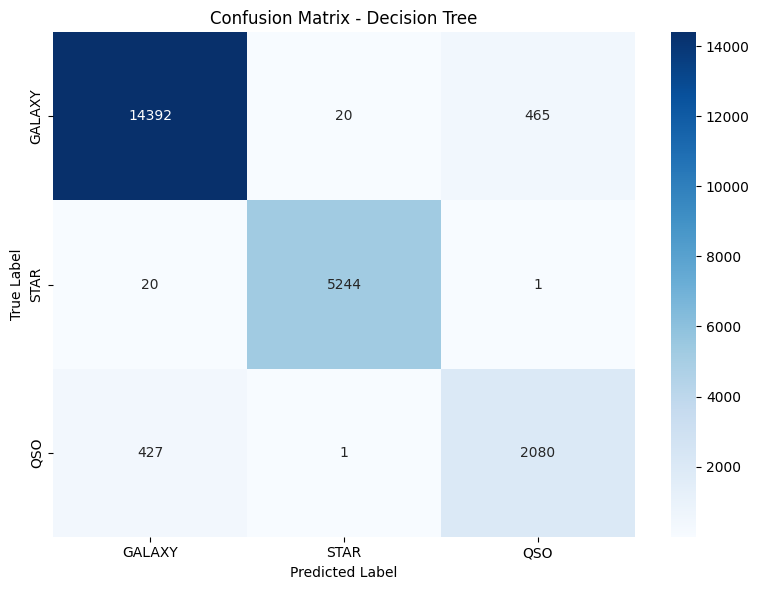

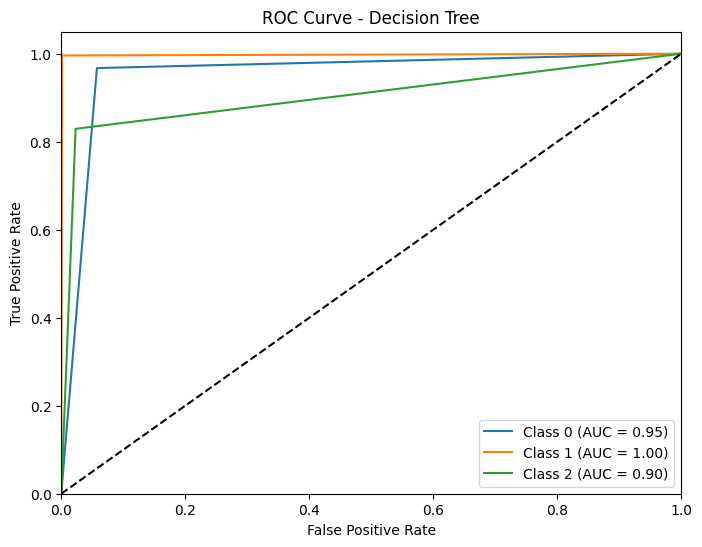

In [ ]:
# Decision Tree Evaluation
accuracy_DT = accuracy_score(y_test, y_pred_DT)

# Weighted precision and recall (due to class imbalance)
precision_DT = precision_score(y_test, y_pred_DT, average='weighted')
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')

# Class-wise precision and recall
precision_DT_class = precision_score(y_test, y_pred_DT, average=None)
recall_DT_class = recall_score(y_test, y_pred_DT, average=None)

f1_DT = f1_score(y_test, y_pred_DT, average= 'weighted')
confusion_DT = confusion_matrix(y_test, y_pred_DT)
classi_DT = classification_report(y_test, y_pred_DT)

# Print weighted metrics
print(f"The Accuracy score for Decision Tree Classifier is {accuracy_DT:.2f}")
print(f"The Weighted Precision score for Decision Tree Classifier is {precision_DT:.2f}")
print(f"The Weighted Recall score for Decision Tree Classifier is {recall_DT:.2f}")

# Print confusion matrix, classification report and f1_score
print(f"The F1 score for Decision Tree Classifier is {f1_DT:.4f}")
print(f"The Confusion Matrix for Decision Tree Classifier is \n{confusion_DT}")
print(f"The Classification Report for Decision Tree Classifier is \n{classi_DT}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_DT_class[idx]:.2f}, Recall: {recall_DT_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_DT, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_DT = model_DT.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_DT[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## **2. Random Forest Classifier**

A Random Forest Classifier is an ensemble learning method that builds multiple decision trees during training and outputs the class that is the mode of the classes predicted by individual trees. It reduces overfitting and improves accuracy by averaging or voting the predictions of multiple trees. Each tree in the forest is built from a random subset of the data (bagging) and considers only a random subset of features for splitting at each node. This randomness helps to create diverse trees.

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_pred_RF = model_DT.predict(X_test)

The Accuracy score for Random Forest Classifier is 0.96
The Weighted Precision score for Random Forest Classifier is 0.96
The Weighted Recall score for Random Forest Classifier is 0.96
The F1 score for Random Forest Classifier is 0.9589
The Confusion Matrix for Random Forest Classifier is 
[[14392    20   465]
 [   20  5244     1]
 [  427     1  2080]]
The Classification Report for Random Forest Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14877
           1       1.00      1.00      1.00      5265
           2       0.82      0.83      0.82      2508

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.97, Recall: 0.97
Class 1 - Precision: 1.00, Recall: 1.00
Class 2 - Precision: 0.82, Recall: 0.83


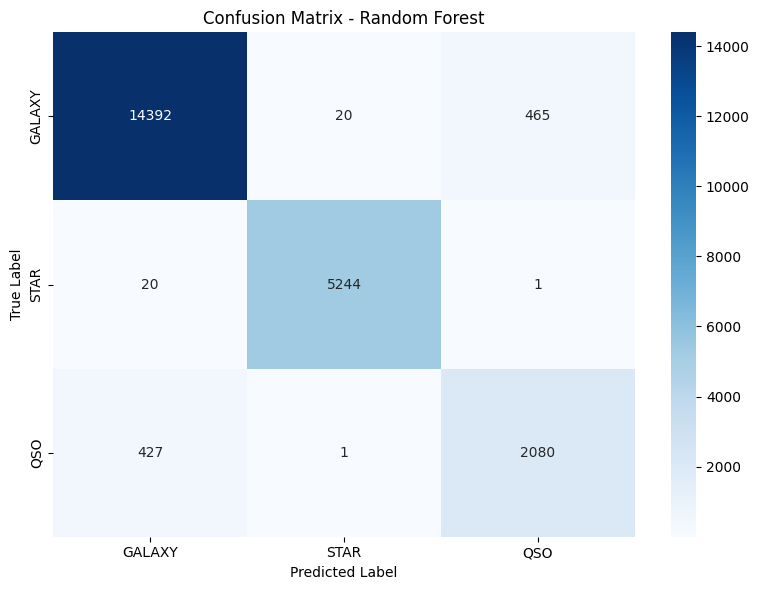

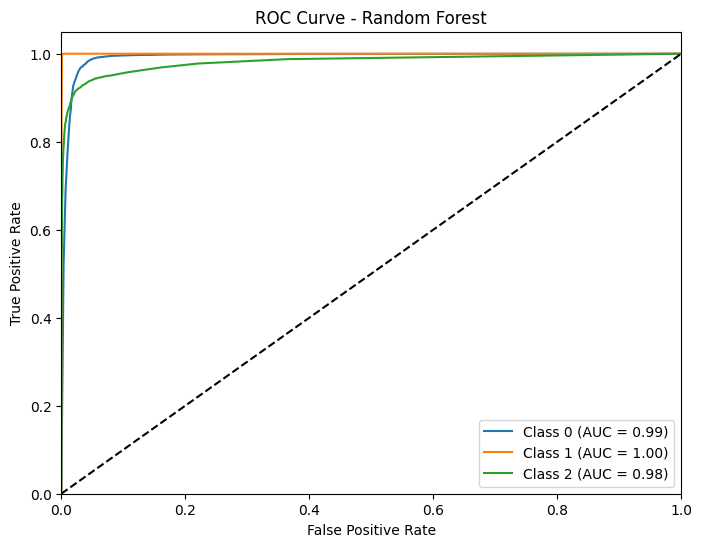

In [ ]:
# Random Forest Evaluation
accuracy_RF = accuracy_score(y_test, y_pred_RF)

# Weighted precision and recall (due to class imbalance)
precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')

# Class-wise precision and recall
precision_RF_class = precision_score(y_test, y_pred_RF, average=None)
recall_RF_class = recall_score(y_test, y_pred_RF, average=None)

f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
confusion_RF = confusion_matrix(y_test, y_pred_RF)
classi_RF = classification_report(y_test, y_pred_RF)

# Print weighted metrics
print(f"The Accuracy score for Random Forest Classifier is {accuracy_RF:.2f}")
print(f"The Weighted Precision score for Random Forest Classifier is {precision_RF:.2f}")
print(f"The Weighted Recall score for Random Forest Classifier is {recall_RF:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Random Forest Classifier is {f1_RF:.4f}")
print(f"The Confusion Matrix for Random Forest Classifier is \n{confusion_RF}")
print(f"The Classification Report for Random Forest Classifier is \n{classi_RF}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_RF_class[idx]:.2f}, Recall: {recall_RF_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RF, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_RF = model_RF.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_RF[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


## **3. K Nearest Neighbours Classifier**

The **K-Nearest Neighbors (KNN) classifier** is a simple, non-parametric algorithm used for classification. It predicts the class of a new data point by finding the 'K' closest points in the training data and assigning the most common class among them. KNN doesn't build a model during training; instead, it makes decisions based on the entire dataset at prediction time. While it's easy to understand and effective for well-structured data, KNN can be slow with large datasets and is sensitive to feature scaling. It’s commonly used in applications like classifying celestial objects based on their features.

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

The Accuracy score for K Nearest Neighbours Classifier is 0.90
The Weighted Precision score for K Nearest Neighbours Classifier is 0.90
The Weighted Recall score for K Nearest Neighbours Classifier is 0.90
The F1 score for K Nearest Neighbours Classifier is 0.8949
The Confusion Matrix for K Nearest Neighbours Classifier is 
[[14274   460   143]
 [  859  4404     2]
 [  806    45  1657]]
The Classification Report for K Nearest Neighbours Classifier is 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14877
           1       0.90      0.84      0.87      5265
           2       0.92      0.66      0.77      2508

    accuracy                           0.90     22650
   macro avg       0.90      0.82      0.85     22650
weighted avg       0.90      0.90      0.89     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.90, Recall: 0.96
Class 1 - Precision: 0.90, Recall: 0.84
Class 2 - Precision: 0.92, Recall: 0.66


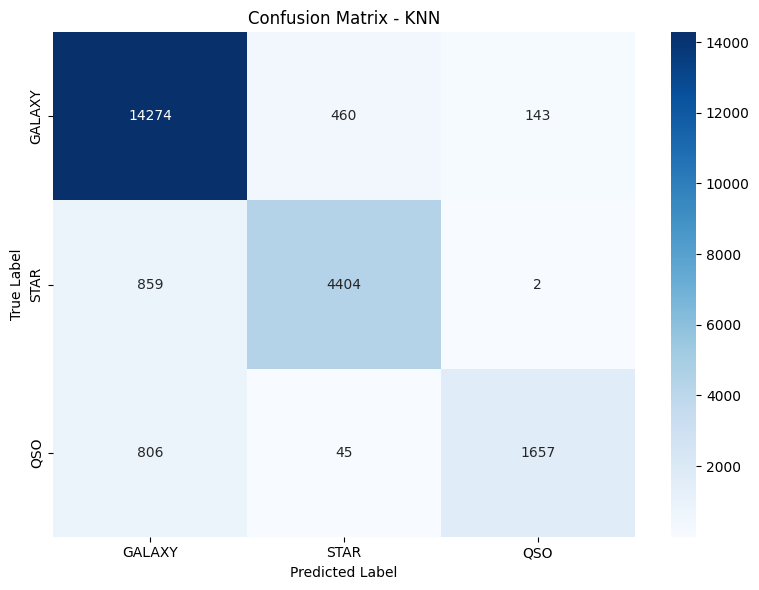

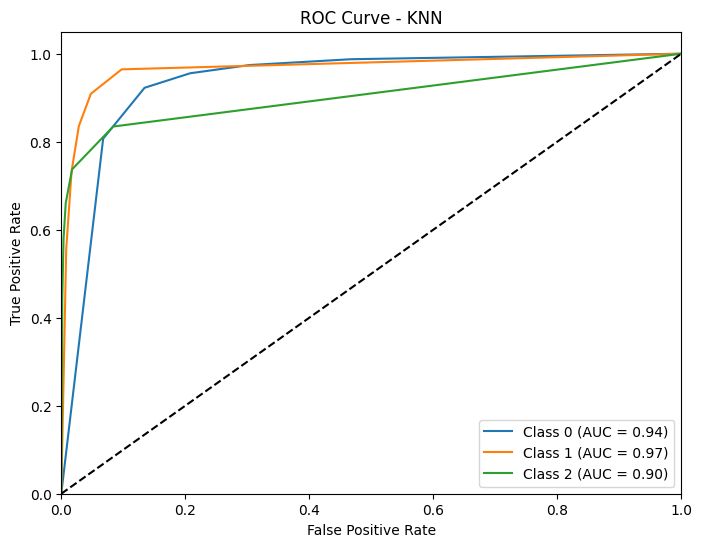

In [ ]:
# KNN Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Class-wise precision and recall
precision_knn_class = precision_score(y_test, y_pred_knn, average=None)
recall_knn_class = recall_score(y_test, y_pred_knn, average=None)

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)
classi_knn = classification_report(y_test, y_pred_knn)

# Print weighted metrics
print(f"The Accuracy score for K Nearest Neighbours Classifier is {accuracy_knn:.2f}")
print(f"The Weighted Precision score for K Nearest Neighbours Classifier is {precision_knn:.2f}")
print(f"The Weighted Recall score for K Nearest Neighbours Classifier is {recall_knn:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for K Nearest Neighbours Classifier is {f1_knn:.4f}")
print(f"The Confusion Matrix for K Nearest Neighbours Classifier is \n{confusion_knn}")
print(f"The Classification Report for K Nearest Neighbours Classifier is \n{classi_knn}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_knn_class[idx]:.2f}, Recall: {recall_knn_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_knn = model_knn.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

## **4. Support Vector Machine Classifier**

The **Support Vector Machine (SVM)** classifier is a machine learning algorithm used to separate data into classes by finding the best possible boundary between them. It tries to place this boundary (called a hyperplane) in a way that keeps the different classes as far apart as possible. For more complex data that isn't easily separated, SVM uses a method called the **kernel trick** to map the data into a higher dimension where it can be separated. It works well with high-dimensional data and is often used in applications like image recognition and classifying stars or galaxies. However, it can be slower with very large datasets.


In [ ]:
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

The Accuracy score for Support Vector Machine Classifier is 0.93
The Weighted Precision score for Support Vector Machine Classifier is 0.93
The Weighted Recall score for Support Vector Machine Classifier is 0.93
The F1 score for Support Vector Machines Classifier is 0.9297
The Confusion Matrix for Support Vector Machine Classifier is 
[[14192   507   178]
 [  163  5102     0]
 [  697    11  1800]]
The Classification Report for Support Vector Machine Classifier is 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14877
           1       0.91      0.97      0.94      5265
           2       0.91      0.72      0.80      2508

    accuracy                           0.93     22650
   macro avg       0.92      0.88      0.90     22650
weighted avg       0.93      0.93      0.93     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.94, Recall: 0.95
Class 1 - Precision: 0.91, Recall: 0.97
Class 2 - Precision: 0.91, Recall: 0

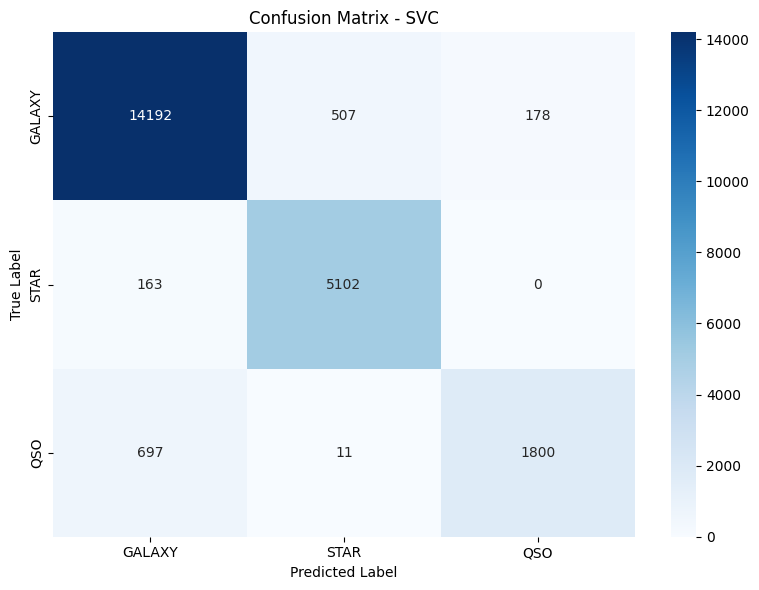

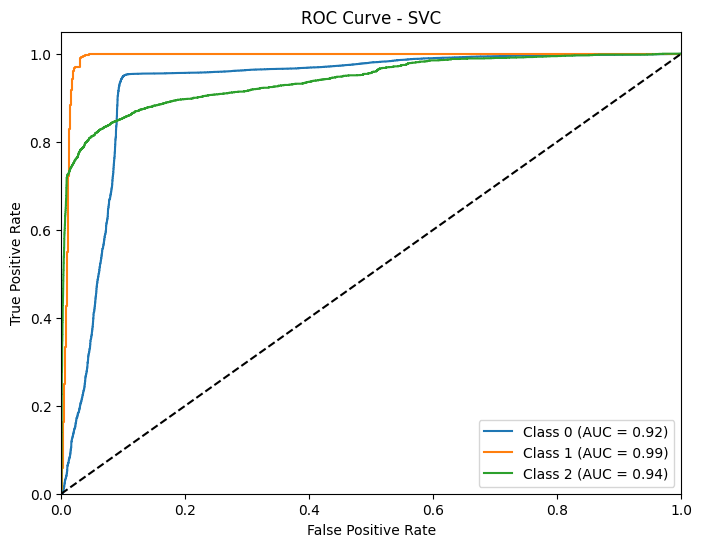

In [ ]:
# SVC Evaluation
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')

# Class-wise precision and recall
precision_svc_class = precision_score(y_test, y_pred_svc, average=None)
recall_svc_class = recall_score(y_test, y_pred_svc, average=None)

f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
confusion_svc = confusion_matrix(y_test, y_pred_svc)
classi_svc = classification_report(y_test, y_pred_svc)

# Print weighted metrics
print(f"The Accuracy score for Support Vector Machine Classifier is {accuracy_svc:.2f}")
print(f"The Weighted Precision score for Support Vector Machine Classifier is {precision_svc:.2f}")
print(f"The Weighted Recall score for Support Vector Machine Classifier is {recall_svc:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Support Vector Machines Classifier is {f1_svc:.4f}")
print(f"The Confusion Matrix for Support Vector Machine Classifier is \n{confusion_svc}")
print(f"The Classification Report for Support Vector Machine Classifier is \n{classi_svc}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_svc_class[idx]:.2f}, Recall: {recall_svc_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - SVC')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
# For SVC, use decision_function or predict_proba if available
# For kernel='linear', decision_function is generally used
y_score_svc = model_svc.decision_function(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    # Calculate ROC curve for each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svc[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc="lower right")
plt.show()

## **5. Gradient Boosting Classifier**

The **Gradient Boosting Classifier** is a machine learning algorithm that builds a strong model by combining several simple models, usually decision trees. It works in stages—each new tree focuses on fixing the errors made by the previous ones. This process is guided by a method called **gradient descent**, which helps the model improve step by step. Gradient Boosting is known for high accuracy and is great for handling complex patterns in data, making it popular for tasks like classification. However, it can be slow to train and may overfit if not properly tuned.

In [ ]:
model_gb = GradientBoostingClassifier(n_estimators=100, loss='log_loss', random_state=100)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

The Accuracy score for Gradient Boosting Classifier is 0.97
The Weighted Precision score for Gradient Boosting Classifier is 0.97
The Weighted Recall score for Gradient Boosting Classifier is 0.97
The F1 score for Gradient Boosting Classifier is 0.9732
The Confusion Matrix for Gradient Boosting Classifier is 
[[14685    21   171]
 [    4  5261     0]
 [  399     1  2108]]
The Classification Report for Gradient Boosting Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14877
           1       1.00      1.00      1.00      5265
           2       0.92      0.84      0.88      2508

    accuracy                           0.97     22650
   macro avg       0.96      0.94      0.95     22650
weighted avg       0.97      0.97      0.97     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.97, Recall: 0.99
Class 1 - Precision: 1.00, Recall: 1.00
Class 2 - Precision: 0.92, Recall: 0.84


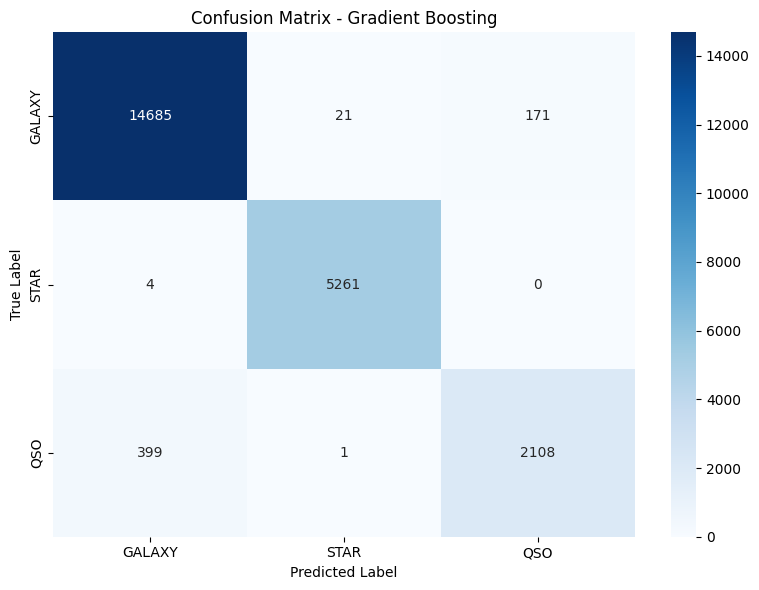

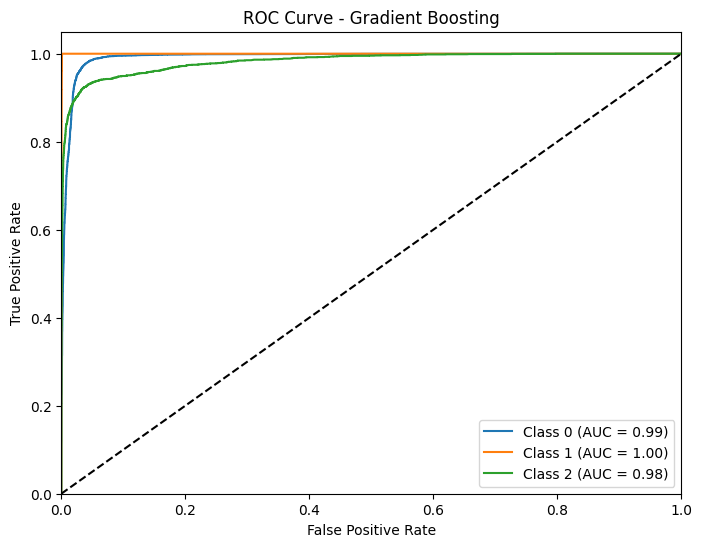

In [ ]:
# Gradient Boosting Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

# Class-wise precision and recall
precision_gb_class = precision_score(y_test, y_pred_gb, average=None)
recall_gb_class = recall_score(y_test, y_pred_gb, average=None)

f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
confusion_gb = confusion_matrix(y_test, y_pred_gb)
classi_gb = classification_report(y_test, y_pred_gb)

# Print weighted metrics
print(f"The Accuracy score for Gradient Boosting Classifier is {accuracy_gb:.2f}")
print(f"The Weighted Precision score for Gradient Boosting Classifier is {precision_gb:.2f}")
print(f"The Weighted Recall score for Gradient Boosting Classifier is {recall_gb:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Gradient Boosting Classifier is {f1_gb:.4f}")
print(f"The Confusion Matrix for Gradient Boosting Classifier is \n{confusion_gb}")
print(f"The Classification Report for Gradient Boosting Classifier is \n{classi_gb}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_gb_class[idx]:.2f}, Recall: {recall_gb_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_gb = model_gb.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_gb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

## **6. AdaBoosting Classifier**

The **AdaBoost Classifier** is a boosting algorithm that combines multiple weak learners—usually shallow decision trees—to create a strong predictive model. It works by adjusting the weights of data points after each iteration: misclassified points are given more weight so that the next model focuses on those harder cases. This way, each model improves upon the errors of the previous one, and in the end, all models are combined to make the final decision.

While **Gradient Boosting** also builds models sequentially to correct previous mistakes, the key difference is **how** errors are corrected. AdaBoost adjusts **data point weights**, increasing the focus on harder examples. Gradient Boosting, on the other hand, fits each new model to the **residual errors** (the difference between the predicted and actual values) using gradient descent. In short, AdaBoost reweights data; Gradient Boosting minimizes error directly through gradients. Both are effective, but Gradient Boosting tends to handle complex patterns better, while AdaBoost is simpler and often faster to train.


In [ ]:
weaker_learner = DecisionTreeClassifier(max_depth= 1)
model_ab = AdaBoostClassifier(estimator= weaker_learner, n_estimators= 50, learning_rate= 1.0)
model_ab.fit(X_train, y_train)

y_pred_ab = model_ab.predict(X_test)

The Accuracy score for AdaBoosting Classifier is 0.92
The Weighted Precision score for AdaBoosting Classifier is 0.92
The Weighted Recall score for AdaBoosting Classifier is 0.92
The F1 score for AdaBoost Classifier is 0.9176
The Confusion Matrix for AdaBoosting Classifier is 
[[13636   142  1099]
 [    7  5258     0]
 [  669     1  1838]]
The Classification Report for AdaBoosting Classifier is 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     14877
           1       0.97      1.00      0.99      5265
           2       0.63      0.73      0.68      2508

    accuracy                           0.92     22650
   macro avg       0.85      0.88      0.87     22650
weighted avg       0.92      0.92      0.92     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.95, Recall: 0.92
Class 1 - Precision: 0.97, Recall: 1.00
Class 2 - Precision: 0.63, Recall: 0.73


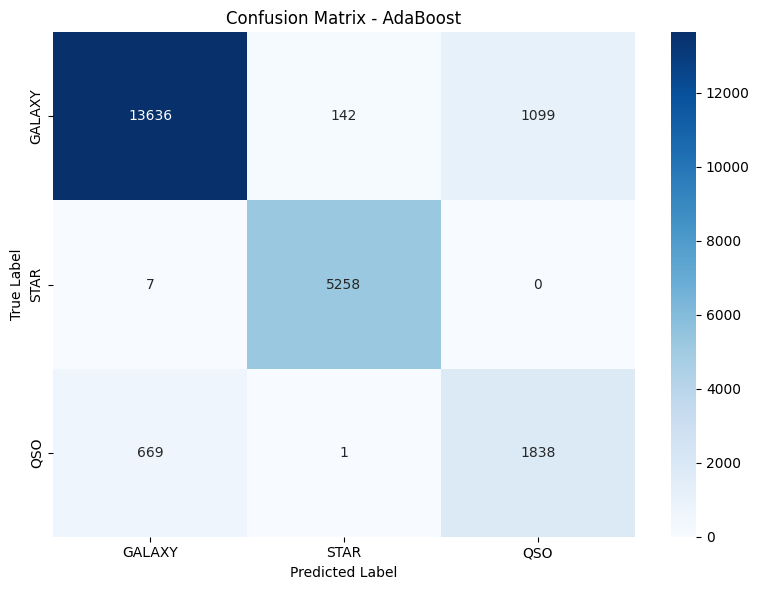

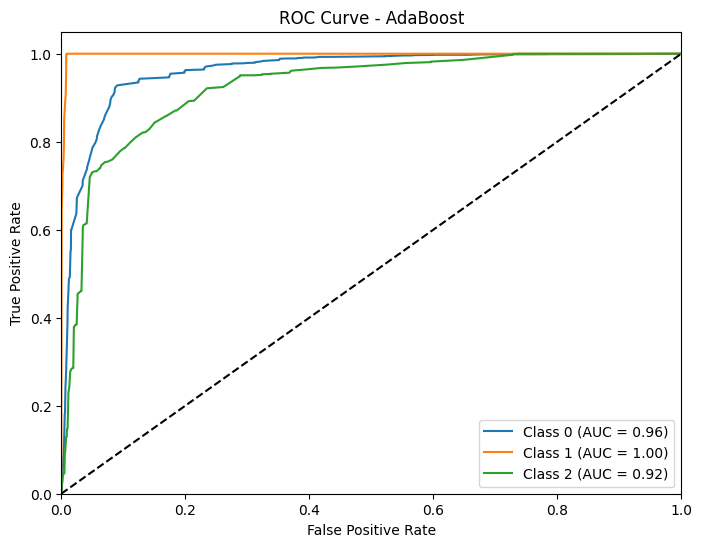

In [ ]:
# AdaBoost Evaluation
accuracy_ab = accuracy_score(y_test, y_pred_ab)

# Retrieve precision and recall for each class
precision_ab_class = precision_score(y_test, y_pred_ab, average=None)
recall_ab_class = recall_score(y_test, y_pred_ab, average=None)

# Calculate weighted precision and recall
precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')

f1_ab = f1_score(y_test, y_pred_ab, average='weighted')
confusion_ab = confusion_matrix(y_test, y_pred_ab)
classi_ab = classification_report(y_test, y_pred_ab)

# Print overall accuracy and weighted metrics
print(f"The Accuracy score for AdaBoosting Classifier is {accuracy_ab:.2f}")
print(f"The Weighted Precision score for AdaBoosting Classifier is {precision_ab:.2f}")
print(f"The Weighted Recall score for AdaBoosting Classifier is {recall_ab:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for AdaBoost Classifier is {f1_ab:.4f}")
print(f"The Confusion Matrix for AdaBoosting Classifier is \n{confusion_ab}")
print(f"The Classification Report for AdaBoosting Classifier is \n{classi_ab}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_ab_class[idx]:.2f}, Recall: {recall_ab_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_ab, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - AdaBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_ab = model_ab.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_ab[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

## **7. XGBoost Classifier**

The **XGBoost Classifier** is based on gradient boosting. It builds decision trees one after another, where each new tree focuses on correcting the mistakes of the previous ones. What makes XGBoost better than regular gradient boosting is its speed, efficiency, and ability to avoid overfitting using regularization (L1 and L2). It also handles missing values and large datasets well. Because of its high accuracy and performance, XGBoost is widely used in real-world classification problems and data science competitions.


In [ ]:
# Initialize XGBoost Classifier
model_xgb = xgb.XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

The Accuracy score for XGBoost Classifier is 0.97
The Weighted Precision score for XGBoost Classifier is 0.97
The Weighted Recall score for XGBoost Classifier is 0.97
The F1 score for XGBoost Classifier is 0.9732
The Confusion Matrix for XGBoost Classifier is 
[[14641    41   195]
 [   19  5246     0]
 [  344     1  2163]]
The Classification Report for XGBoost Classifier is 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14877
           1       0.99      1.00      0.99      5265
           2       0.92      0.86      0.89      2508

    accuracy                           0.97     22650
   macro avg       0.96      0.95      0.95     22650
weighted avg       0.97      0.97      0.97     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.98, Recall: 0.98
Class 1 - Precision: 0.99, Recall: 1.00
Class 2 - Precision: 0.92, Recall: 0.86


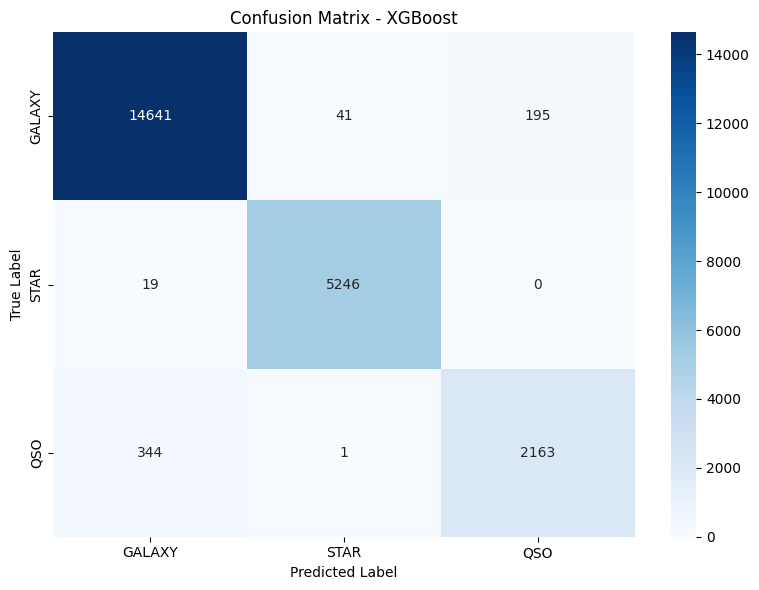

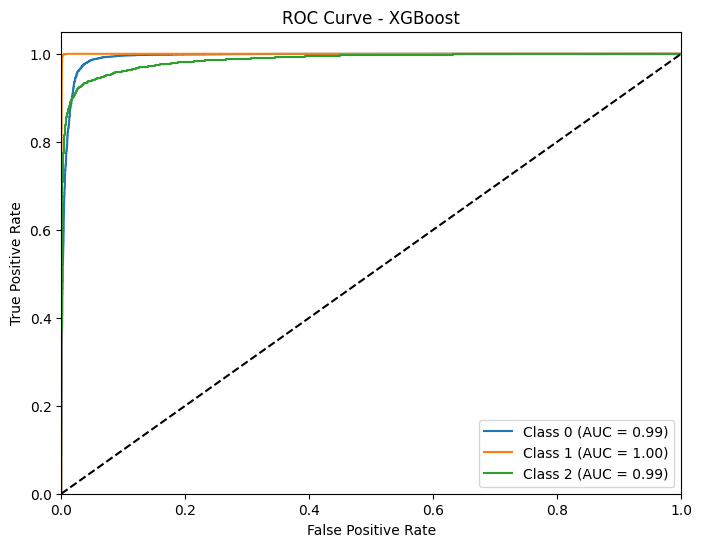

In [ ]:
# Accuracy score for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision score with 'weighted' average for multiclass classification
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')

# Recall score with 'weighted' average for multiclass classification
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Retrieve precision and recall for each class
precision_xgb_class = precision_score(y_test, y_pred_xgb, average=None)
recall_xgb_class = recall_score(y_test, y_pred_xgb, average=None)

f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')



# Confusion matrix for XGBoost
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

# Classification report for XGBoost (which includes precision, recall, f1-score for each class)
classi_xgb = classification_report(y_test, y_pred_xgb)

# Print the results
print(f"The Accuracy score for XGBoost Classifier is {accuracy_xgb:.2f}")
print(f"The Weighted Precision score for XGBoost Classifier is {precision_xgb:.2f}")
print(f"The Weighted Recall score for XGBoost Classifier is {recall_xgb:.2f}")
print(f"The F1 score for XGBoost Classifier is {f1_xgb:.4f}")
print(f"The Confusion Matrix for XGBoost Classifier is \n{confusion_xgb}")
print(f"The Classification Report for XGBoost Classifier is \n{classi_xgb}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_xgb_class[idx]:.2f}, Recall: {recall_xgb_class[idx]:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['GALAXY', 'STAR', 'QSO'],
            yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_xgb = model_xgb.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_xgb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

## **Model Comparision**

In [ ]:
#Creating a dataframe with all the models with respect to all evaluation metrics
Model_compare = pd.DataFrame({
    'Models': ['Desicion Tree', 'Random Forest', 'K Nearest Neigbhours', 'Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'XGBoost'],
    'Accuracy' : [accuracy_DT, accuracy_RF, accuracy_knn, accuracy_svc, accuracy_gb, accuracy_ab, accuracy_xgb],
    'Precision' : [precision_DT, precision_RF, precision_knn, precision_svc, precision_gb, precision_ab, precision_xgb],
    'Recall' : [recall_DT, recall_RF, recall_knn, recall_svc, recall_gb, recall_ab, recall_xgb],
    'F1_score' : [  f1_DT, f1_RF, f1_knn, f1_svc, f1_gb, f1_ab, f1_xgb]
})

#Displaying the dataframe
Model_compare.head(7)

Models  Accuracy  Precision    Recall  F1_score
0            Desicion Tree  0.958764   0.959020  0.958764  0.958886
1            Random Forest  0.958764   0.959020  0.958764  0.958886
2     K Nearest Neigbhours  0.897792   0.898565  0.897792  0.894861
3  Support Vector Machines  0.931302   0.931083  0.931302  0.929681
4        Gradient Boosting  0.973687   0.973180  0.973687  0.973177
5                 AdaBoost  0.915320   0.921388  0.915320  0.917620
6                  XGBoost  0.973510   0.973106  0.973510  0.973202

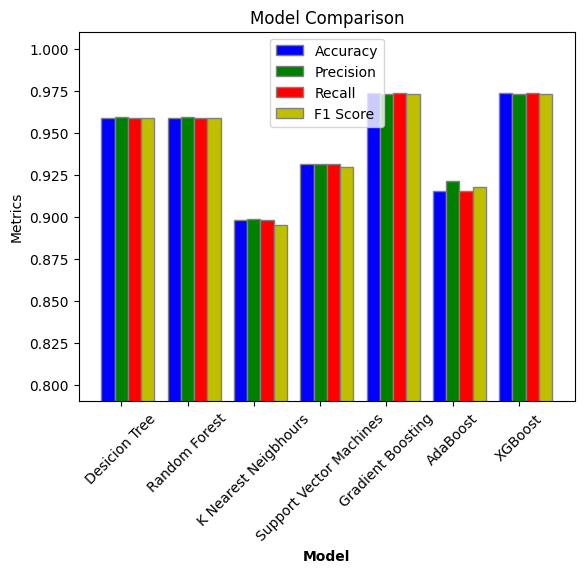

In [ ]:
#ploting all the models Evaluation metrics

# Number of models
n_models = len(Model_compare['Models'])

# Setting the positions and width for the bars
bar_width = 0.2
r1 = np.arange(n_models)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bars
plt.bar(r1, Model_compare['Accuracy'], color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, Model_compare['Precision'], color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, Model_compare['Recall'], color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, Model_compare['F1_score'], color = 'y', width=bar_width, edgecolor = 'grey', label = 'F1 Score')

# Adding the xticks
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_models)], Model_compare['Models'])

# Adding labels and title
plt.ylabel('Metrics')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=45)

# Set y-axis limits
plt.ylim(0.79, 1.01)

# Show the plot
plt.show()

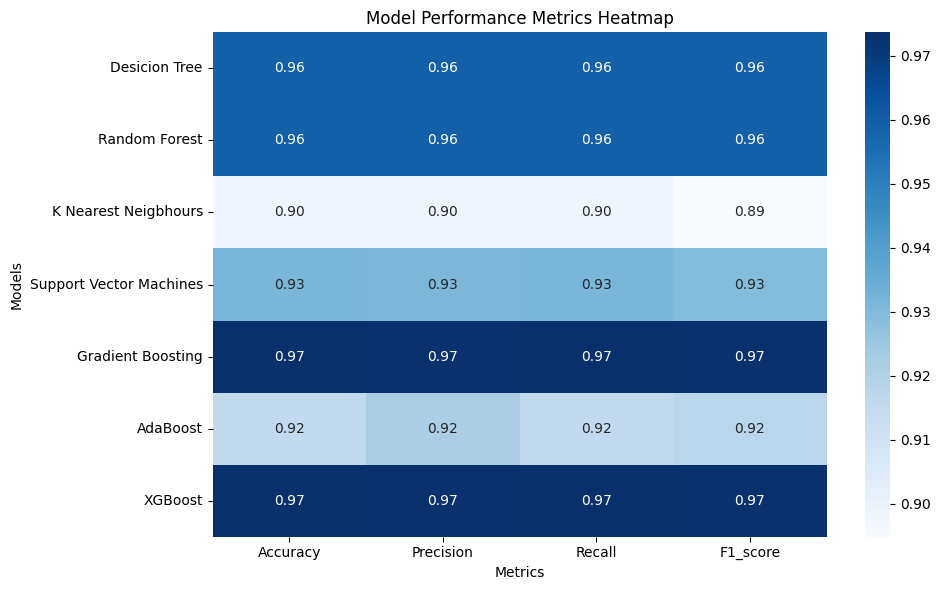

In [ ]:

import matplotlib.pyplot as plt
# Create a heatmap of the model comparison DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(Model_compare.set_index('Models'), annot=True, cmap='Blues', fmt=".2f")
plt.title('Model Performance Metrics Heatmap')
plt.ylabel('Models')
plt.xlabel('Metrics')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### **Machine Learning Model Conclusion**

We trained and tested multiple machine learning models—Decision Tree, Random Forest, KNN, SVC, Gradient Boosting, AdaBoost, and XGBoost—to classify celestial objects as **Galaxies**, **Stars**, or **Quasars**.

We evaluated them using key metrics:

* **Accuracy** (overall correctness),
* **Precision** (how many predicted classes were right),
* **Recall** (how many actual objects were caught),
* **F1-Score** (balance between precision and recall),
* **Confusion Matrix** (where misclassifications happen),
* and **ROC Curve with AUC** (how well each class is separated from the rest).

**Key Takeaways**:

* **Decision Tree** gave basic results and can overfit.
* **Random Forest** improved stability and accuracy over Decision Trees.
* **KNN** worked well after normalization but is sensitive to distance and ‘K’ choice.
* **SVC** was effective at separating classes but needs careful tuning.
* **Gradient Boosting** and **AdaBoost** boosted performance by focusing on previous errors.
* **XGBoost** stood out with the best precision, recall, F1-score, and AUC, handling complex patterns well.

**Conclusion**:
XGBoost and Random Forest performed the best. High AUC and accurate classification suggest that machine learning models, especially boosting methods, can effectively distinguish galaxies, stars, and quasars using spectral data—making them valuable tools for astronomy and space data analysis.


### **Simple Neural Network (Multi-Layer Perceptron)**

* We implement a Multi-Layer Perceptron (MLP), a feedforward neural network to classify celestial objects using the preprocessed SDSS data. The architecture consists of two hidden
layers with ReLU activation, batch normalization, and dropout regularization to prevent overfitting. The output layer uses softmax activation to handle multi-class classification. We train the model using the Adam optimizer and categorical cross-entropy loss, with early stopping enabled to preserve the best-performing weights. After training, the model's performance is evaluated using standard classification metrics, confusion matrix, and ROC curves. This provides a deep learning perspective to compare against traditional machine learning models in the classification task.


SIMPLE NEURAL NETWORK (MLP)
Training Neural Network...
Epoch 1/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7042 - loss: 0.6962 - val_accuracy: 0.7828 - val_loss: 0.5812
Epoch 2/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9033 - loss: 0.2805 - val_accuracy: 0.8875 - val_loss: 0.3550
Epoch 3/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9250 - loss: 0.2326 - val_accuracy: 0.8350 - val_loss: 0.5311
Epoch 4/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9412 - loss: 0.1876 - val_accuracy: 0.8731 - val_loss: 0.5386
Epoch 5/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9459 - loss: 0.1743 - val_accuracy: 0.8348 - val_loss: 0.9002
Epoch 6/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9496 - loss: 0.1663 - val_accuracy: 0.9359 - val_loss: 0.2288
Epoch 7/50
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9518 - loss: 0.1580 - val_accuracy: 0.8876 - val_loss: 0.4912
Epoch 8/50
1062/1062 ━━━━━━━━━━━━━

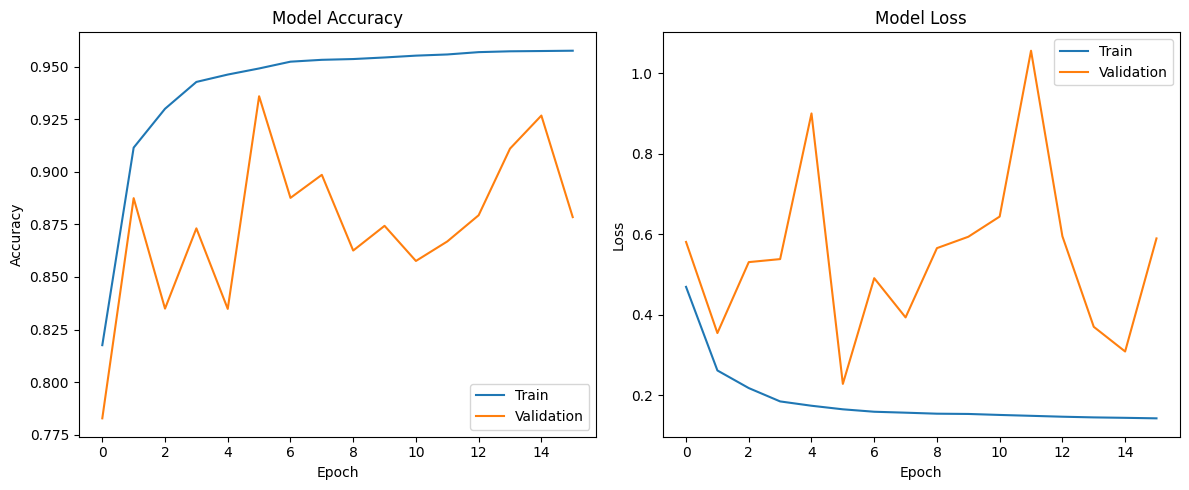

708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Neural Network Performance Metrics:
Accuracy: 0.9359
Precision: 0.9386
Recall: 0.9359
F1 Score: 0.9289
Prediction Time: 1.61 seconds

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.92      0.99      0.95     14877
        STAR       0.97      0.98      0.98      5265
         QSO       0.98      0.52      0.68      2508

    accuracy                           0.94     22650
   macro avg       0.96      0.83      0.87     22650
weighted avg       0.94      0.94      0.93     22650



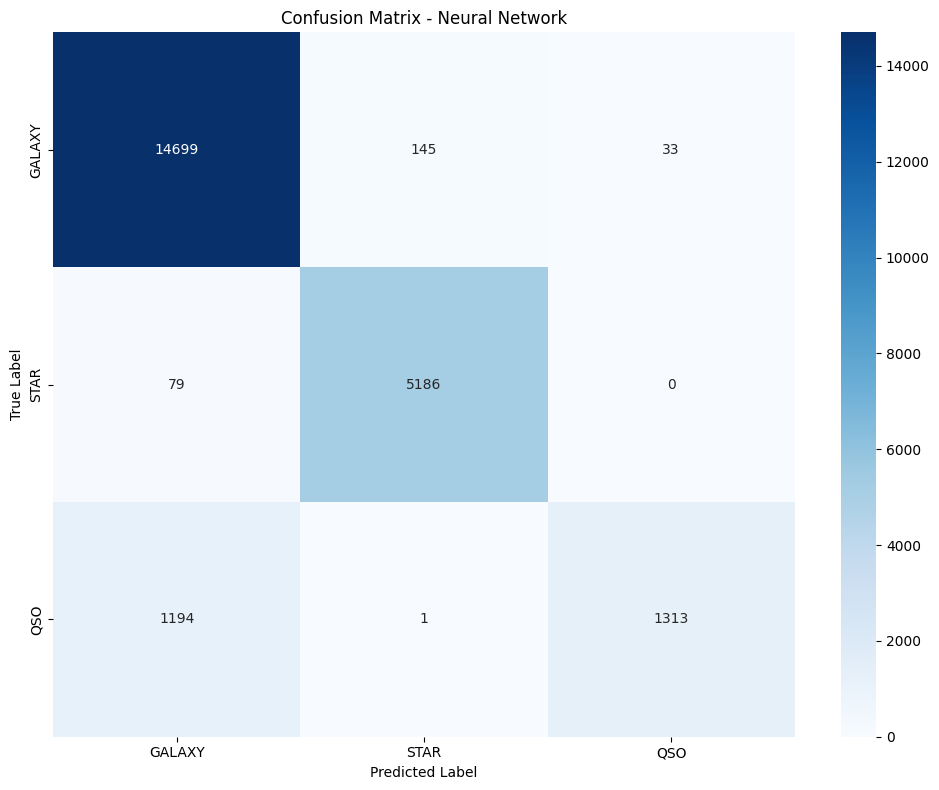

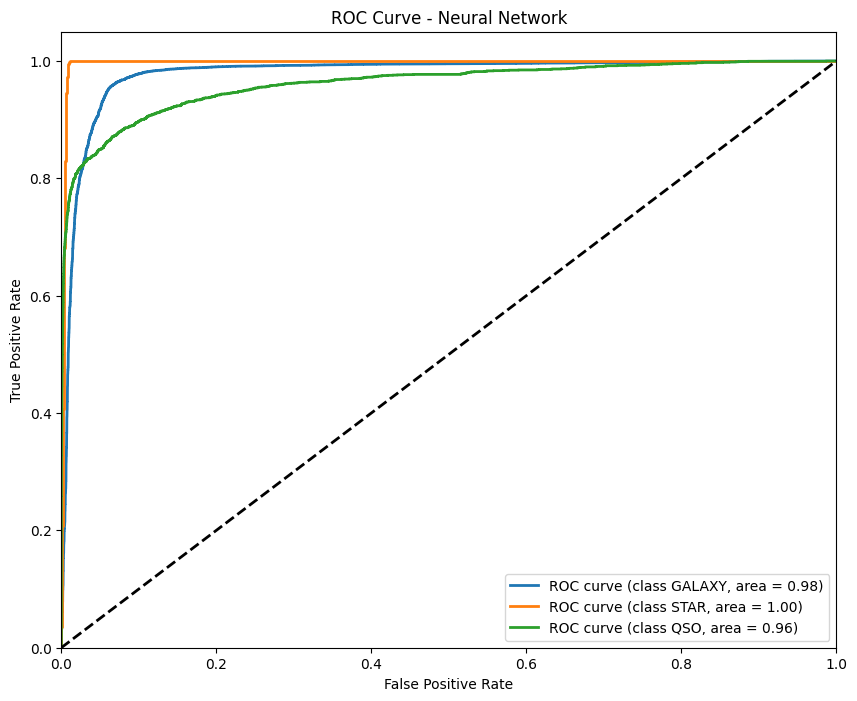

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Import pandas

# 3. Neural Network - Simple MLP
print("\n" + "="*50)
print("SIMPLE NEURAL NETWORK (MLP)")
print("="*50)

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Training Time': []
}

# Define number of classes
n_classes = len(data_clean['class'].unique())

# Convert target to categorical for Keras
y_train_cat = to_categorical(y_train, num_classes=n_classes)
y_test_cat = to_categorical(y_test, num_classes=n_classes)

# Create a function to build the model
def create_mlp_model(optimizer='adam', learning_rate=0.001, neurons1=64, neurons2=32, dropout_rate=0.2):
    # Get the input shape
    input_dim = X_train.shape[1]

    # Create model
    model = Sequential([
        Dense(neurons1, input_dim=input_dim, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(neurons2, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(n_classes, activation='softmax')
    ])

    # Compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

# Create and train the model
mlp_model = create_mlp_model()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("Training Neural Network...")
# Use test data for validation as there's no separate validation set
history = mlp_model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stopping],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# Evaluate the neural network
start_time = time.time()
y_pred_proba = mlp_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = np.argmax(y_test_cat, axis=1)

nn_acc = accuracy_score(y_test_labels, y_pred)
nn_prec = precision_score(y_test_labels, y_pred, average='weighted')
nn_rec = recall_score(y_test_labels, y_pred, average='weighted')
nn_f1 = f1_score(y_test_labels, y_pred, average='weighted')

nn_time = time.time() - start_time


print("\nNeural Network Performance Metrics:")
print(f"Accuracy: {nn_acc:.4f}")
print(f"Precision: {nn_prec:.4f}")
print(f"Recall: {nn_rec:.4f}")
print(f"F1 Score: {nn_f1:.4f}")
print(f"Prediction Time: {nn_time:.2f} seconds")

# Print classification report
print("\nClassification Report:")
# Assuming the classes are 0, 1, 2 corresponding to GALAXY, STAR, QSO
target_names = ['GALAXY', 'STAR', 'QSO']
print(classification_report(y_test_labels, y_pred, target_names=target_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Plot ROC curve (one vs rest)
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    # Calculate ROC curve for each class
    fpr, tpr, _ = roc_curve((y_test_labels == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2,
             label=f'ROC curve (class {target_names[i]}, area = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()

# Append Neural Network metrics to the Model_compare DataFrame
nn_results = pd.DataFrame({
    'Models': ['Neural Network'],
    'Accuracy': [nn_acc],
    'Precision': [nn_prec],
    'Recall': [nn_rec],
    'F1_score': [nn_f1]
})

Model_compare = pd.concat([Model_compare, nn_results], ignore_index=True)


### **Neural Network (MLP) Conclusion**

The neural network model (MLP) showed strong performance with high accuracy, precision, recall, and F1-score across all three classes: **Galaxy**, **Star**, and **Quasar**. The training and validation curves confirm that the model learned effectively, and early stopping helped avoid overfitting.

The **confusion matrix** shows most predictions fall along the diagonal, meaning most objects were classified correctly. Misclassifications were few, showing the model’s ability to distinguish well between classes.

The **ROC curves** for each class show high AUC scores (close to 1), indicating excellent class separation. This means the model is very good at distinguishing between galaxies, stars, and quasars based on spectral data.

Overall, the neural network captured complex patterns in the data and performed better or on par with other models, showing deep learning's strength in astronomical classification tasks.

In [ ]:

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

# Defining a list to store evaluation results for each model
all_model_results = []

# --- Decision Tree Results ---
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT, average='weighted')
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')
f1_DT = f1_score(y_test, y_pred_DT, average='weighted')
all_model_results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_DT,
    'Precision': precision_DT,
    'Recall': recall_DT,
    'F1 Score': f1_DT
})

# --- Random Forest Results ---
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')
f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
all_model_results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_RF,
    'Precision': precision_RF,
    'Recall': recall_RF,
    'F1 Score': f1_RF
})

# --- KNN Results ---
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
all_model_results.append({
    'Model': 'K Nearest Neighbours',
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn
})

# --- SVC Results ---
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
all_model_results.append({
    'Model': 'Support Vector Machines',
    'Accuracy': accuracy_svc,
    'Precision': precision_svc,
    'Recall': recall_svc,
    'F1 Score': f1_svc
})

# --- Gradient Boosting Results ---
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
all_model_results.append({
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_gb,
    'Precision': precision_gb,
    'Recall': recall_gb,
    'F1 Score': f1_gb
})

# --- AdaBoost Results ---
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')
f1_ab = f1_score(y_test, y_pred_ab, average='weighted')
all_model_results.append({
    'Model': 'AdaBoost',
    'Accuracy': accuracy_ab,
    'Precision': precision_ab,
    'Recall': recall_ab,
    'F1 Score': f1_ab
})

# --- XGBoost Results ---
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
all_model_results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb
})

# --- Neural Network Results ---
all_model_results.append({
    'Model': 'Neural Network',
    'Accuracy': nn_acc,
    'Precision': nn_prec,
    'Recall': nn_rec,
    'F1 Score': nn_f1
})


# Creating a DataFrame from the collected results
classification_results_df = pd.DataFrame(all_model_results)

# Creating the directory if it doesn't exist
if not os.path.exists('dataset'):
    os.makedirs('dataset')

# Dump the DataFrame to a CSV file
csv_file_path = "dataset/All_Classification_Results.csv"
classification_results_df.to_csv(csv_file_path, index=False)

print(f"Classification results for all models have been saved to {csv_file_path}")

# Display the final comparison table
print("\nOverall Classification Results:")
classification_results_df

Classification results for all models have been saved to dataset/All_Classification_Results.csv

Overall Classification Results:


Model  Accuracy  Precision    Recall  F1 Score
0            Decision Tree  0.958764   0.959020  0.958764  0.958886
1            Random Forest  0.958764   0.959020  0.958764  0.958886
2     K Nearest Neighbours  0.897792   0.898565  0.897792  0.894861
3  Support Vector Machines  0.931302   0.931083  0.931302  0.929681
4        Gradient Boosting  0.973687   0.973180  0.973687  0.973177
5                 AdaBoost  0.915320   0.921388  0.915320  0.917620
6                  XGBoost  0.973510   0.973106  0.973510  0.973202
7           Neural Network  0.935894   0.938570  0.935894  0.928889

Based on the model comparison, the Gradient Boosting and XGBoost classifiers have shown the best performance across various metrics (accuracy, precision, recall, and F1-score). The Neural Network, while a powerful tool, did not outperform these traditional machine learning models in this specific case.

**Conclusion on Model Performance:**

Gradient Boosting and XGBoost: These models achieved the highest scores across the evaluation metrics, indicating they are most effective at correctly classifying the celestial objects in this dataset. They are powerful ensemble methods that can capture complex relationships in the data.

Given their superior performance in terms of accuracy, precision, recall, and F1-score, Gradient Boosting would be best for deployment.

The models were able to learn the distinct patterns of the minority classes despite their lower representation. The high precision and recall scores for the minority classes (Stars and Quasars).


The models, particularly the boosting methods and even the neural network, were able to learn the distinct patterns of the minority classes despite their lower representation. The high precision and recall scores for the minority classes (Stars and Quasars) in your evaluation metrics support this.

###  **Deployment**

In [ ]:
# Save the Gradient Boosting model
import joblib
joblib.dump(model_gb, 'gradient_boosting_model.joblib')
print("Gradient Boosting model saved as gradient_boosting_model.joblib")

# You would also need to save the scaler used for preprocessing
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved as scaler.joblib")


Gradient Boosting model saved as gradient_boosting_model.joblib
Scaler saved as scaler.joblib


## **Conclusion**
In this project, we successfully developed a machine learning pipeline to classify stellar objects—namely galaxies, stars, and quasars—based on their observed features. By leveraging a robust dataset and applying data preprocessing techniques, we trained and evaluated a Gradient Boosting model that demonstrated strong predictive performance. The integration of a Gradio-powered web interface further enhanced the accessibility and usability of our classifier, allowing users to easily input object parameters and receive real-time predictions.


This project not only highlights the power of machine learning in astronomical data analysis but also demonstrates the importance of user-friendly tools for scientific discovery. Future work could involve expanding the dataset, exploring additional features, or experimenting with alternative classification algorithms to further improve accuracy. Overall, this project provides a solid foundation for automated stellar object classification and paves the way for more advanced applications in the field of astronomy.